In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
import os,sys
import fitsio as fio
import matplotlib as mpl
from tqdm import tqdm
import proplot as pplt
import pickle
import pandas as pd
%matplotlib inline

matplotlib.rcParams.update({'font.size': 20})

## properties

In [2]:
d_pgauss_griz = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/mdet_stats_pgauss_griz_1267tiles.fits')
d_pgauss_riz = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/mdet_stats_pgauss_riz_1267tiles.fits')
# d_wmom = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/mdet_stats_wmom_griz.fits')
# d_wmom_riz = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/mdet_stats_wmom_riz.fits')

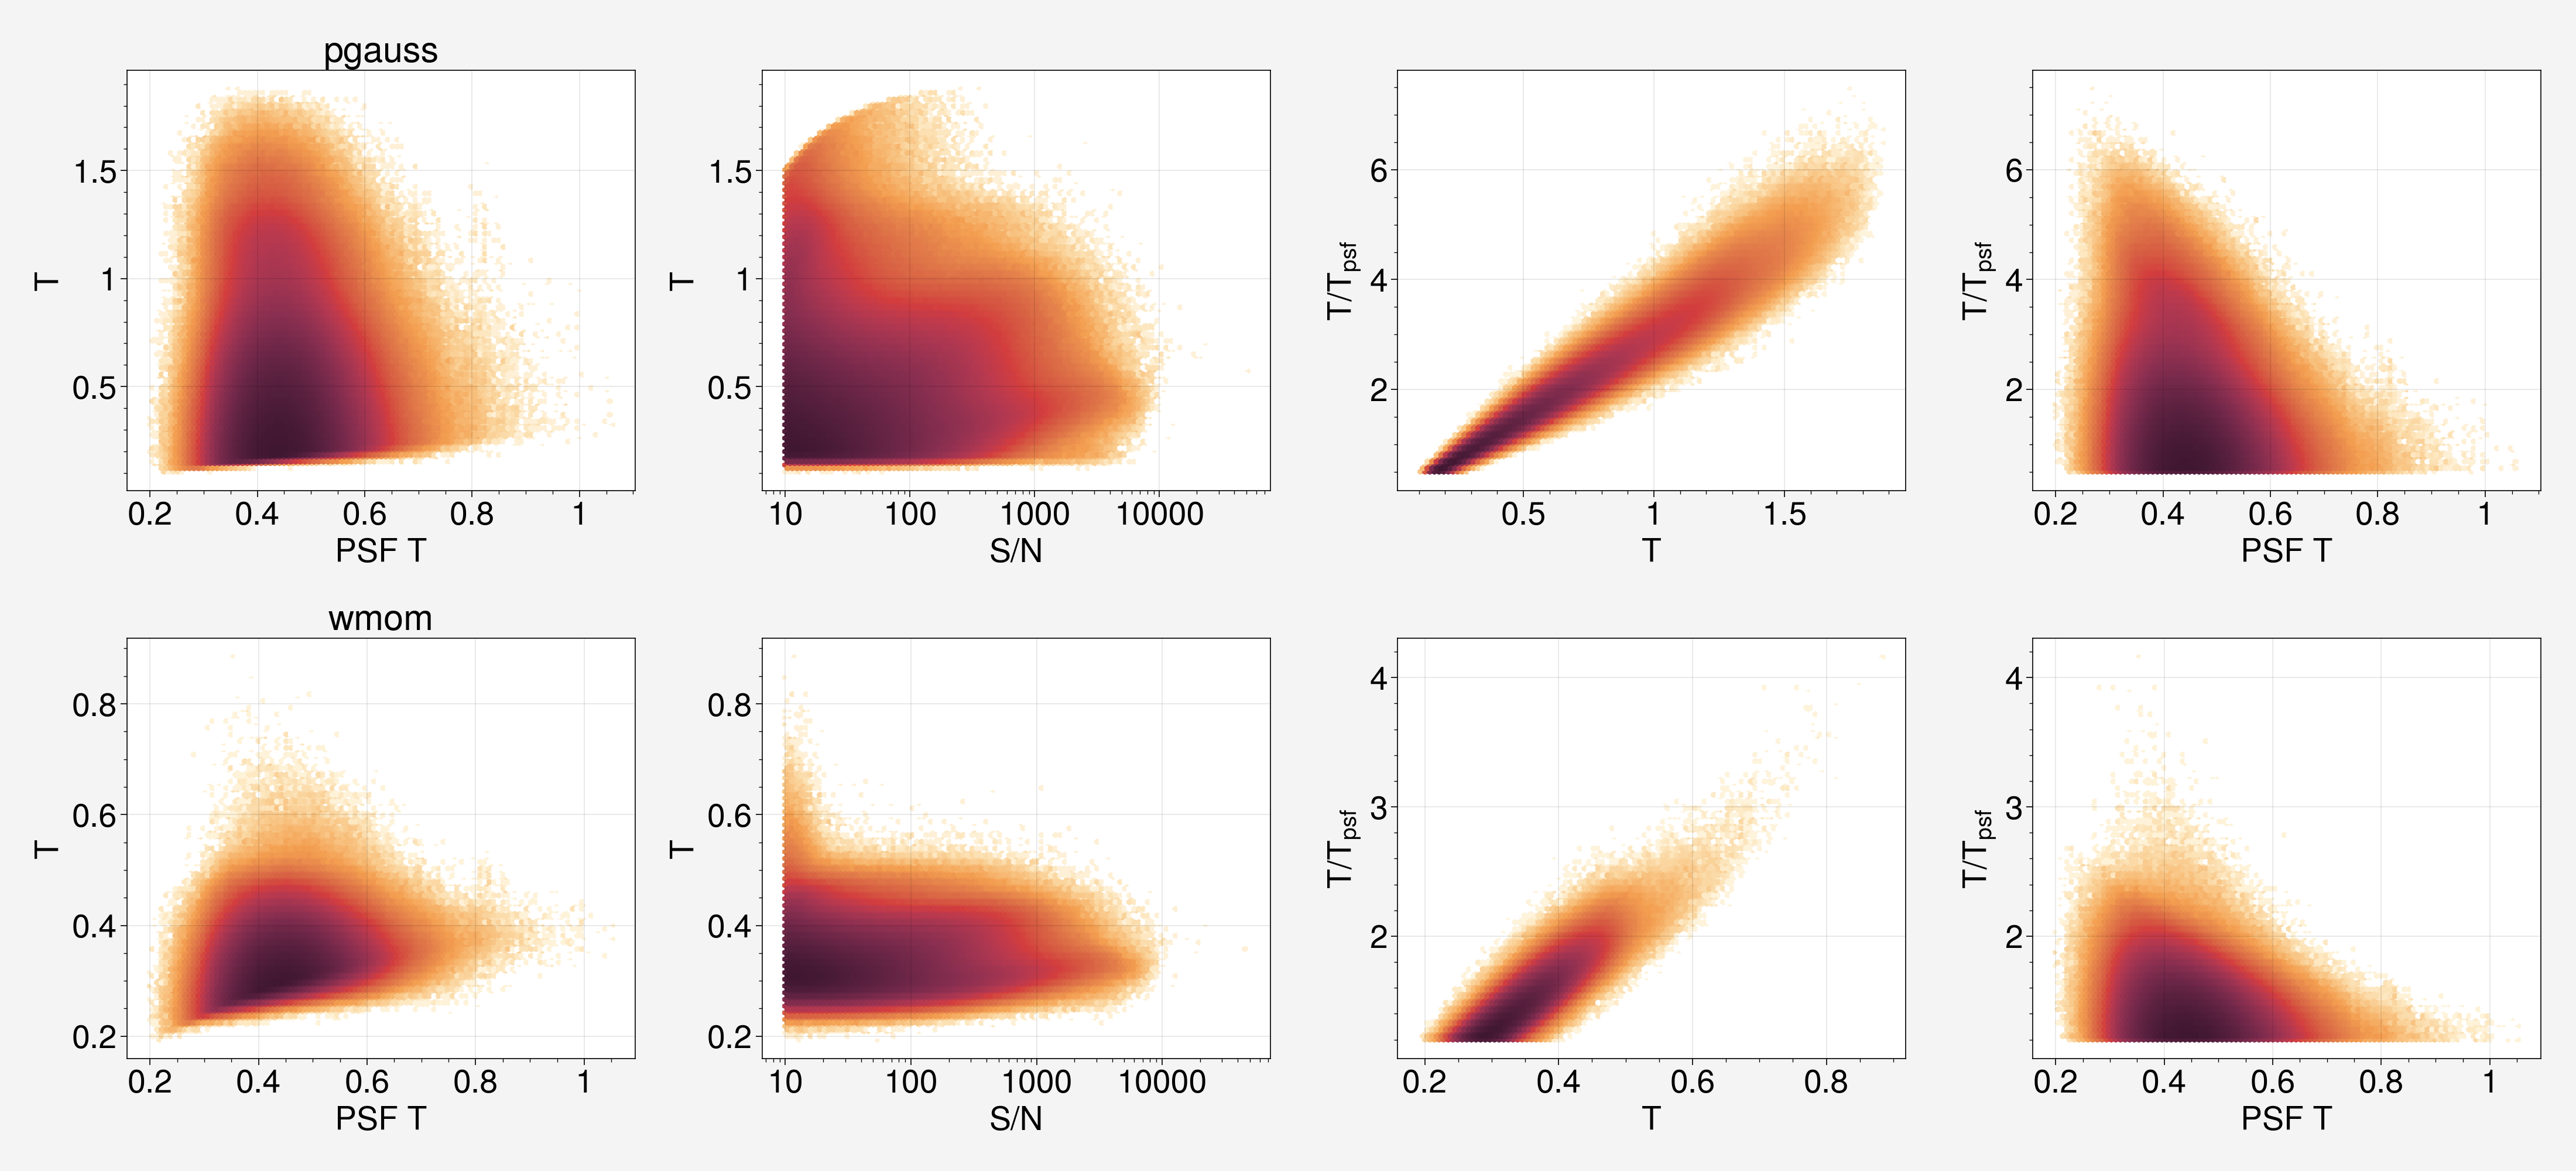

In [3]:
layout = np.arange(8).reshape(2, 4)
fig,ax = plt.subplot_mosaic(layout, figsize=(22,10))


ax[0].hexbin(d_pgauss['psfrec_T'], d_pgauss['pgauss_T'], gridsize=100, bins='log')
ax[0].set_xlabel(r'PSF T')
ax[0].set_ylabel(r'T')
ax[0].set_title('pgauss')

ax[1].hexbin(d_pgauss['pgauss_s2n'], d_pgauss['pgauss_T'], gridsize=100, xscale='log', bins='log')
ax[1].set_xlabel(r'S/N')
ax[1].set_xscale('log')
ax[1].set_ylabel(r'T')

ax[2].hexbin(d_pgauss['pgauss_T'], d_pgauss['pgauss_T_ratio'], gridsize=100, bins='log')
ax[2].set_xlabel(r'T')
ax[2].set_ylabel(r'$T/T_{psf}$')

ax[3].hexbin(d_pgauss['psfrec_T'], d_pgauss['pgauss_T_ratio'], gridsize=100, bins='log')
ax[3].set_xlabel(r'PSF T')
ax[3].set_ylabel(r'$T/T_{psf}$')


ax[4].hexbin(d_wmom['psfrec_T'], d_wmom['wmom_T'], gridsize=100, bins='log')
ax[4].set_xlabel(r'PSF T')
ax[4].set_ylabel(r'T')
ax[4].set_title('wmom')

ax[5].hexbin(d_wmom['wmom_s2n'], d_wmom['wmom_T'], gridsize=100, xscale='log', bins='log')
ax[5].set_xlabel(r'S/N')
ax[5].set_xscale('log')
ax[5].set_ylabel(r'T')

ax[6].hexbin(d_wmom['wmom_T'], d_wmom['wmom_T_ratio'], gridsize=100, bins='log')
ax[6].set_xlabel(r'T')
ax[6].set_ylabel(r'$T/T_{psf}$')

ax[7].hexbin(d_wmom['psfrec_T'], d_wmom['wmom_T_ratio'], gridsize=100, bins='log')
ax[7].set_xlabel(r'PSF T')
ax[7].set_ylabel(r'$T/T_{psf}$')


plt.tight_layout()

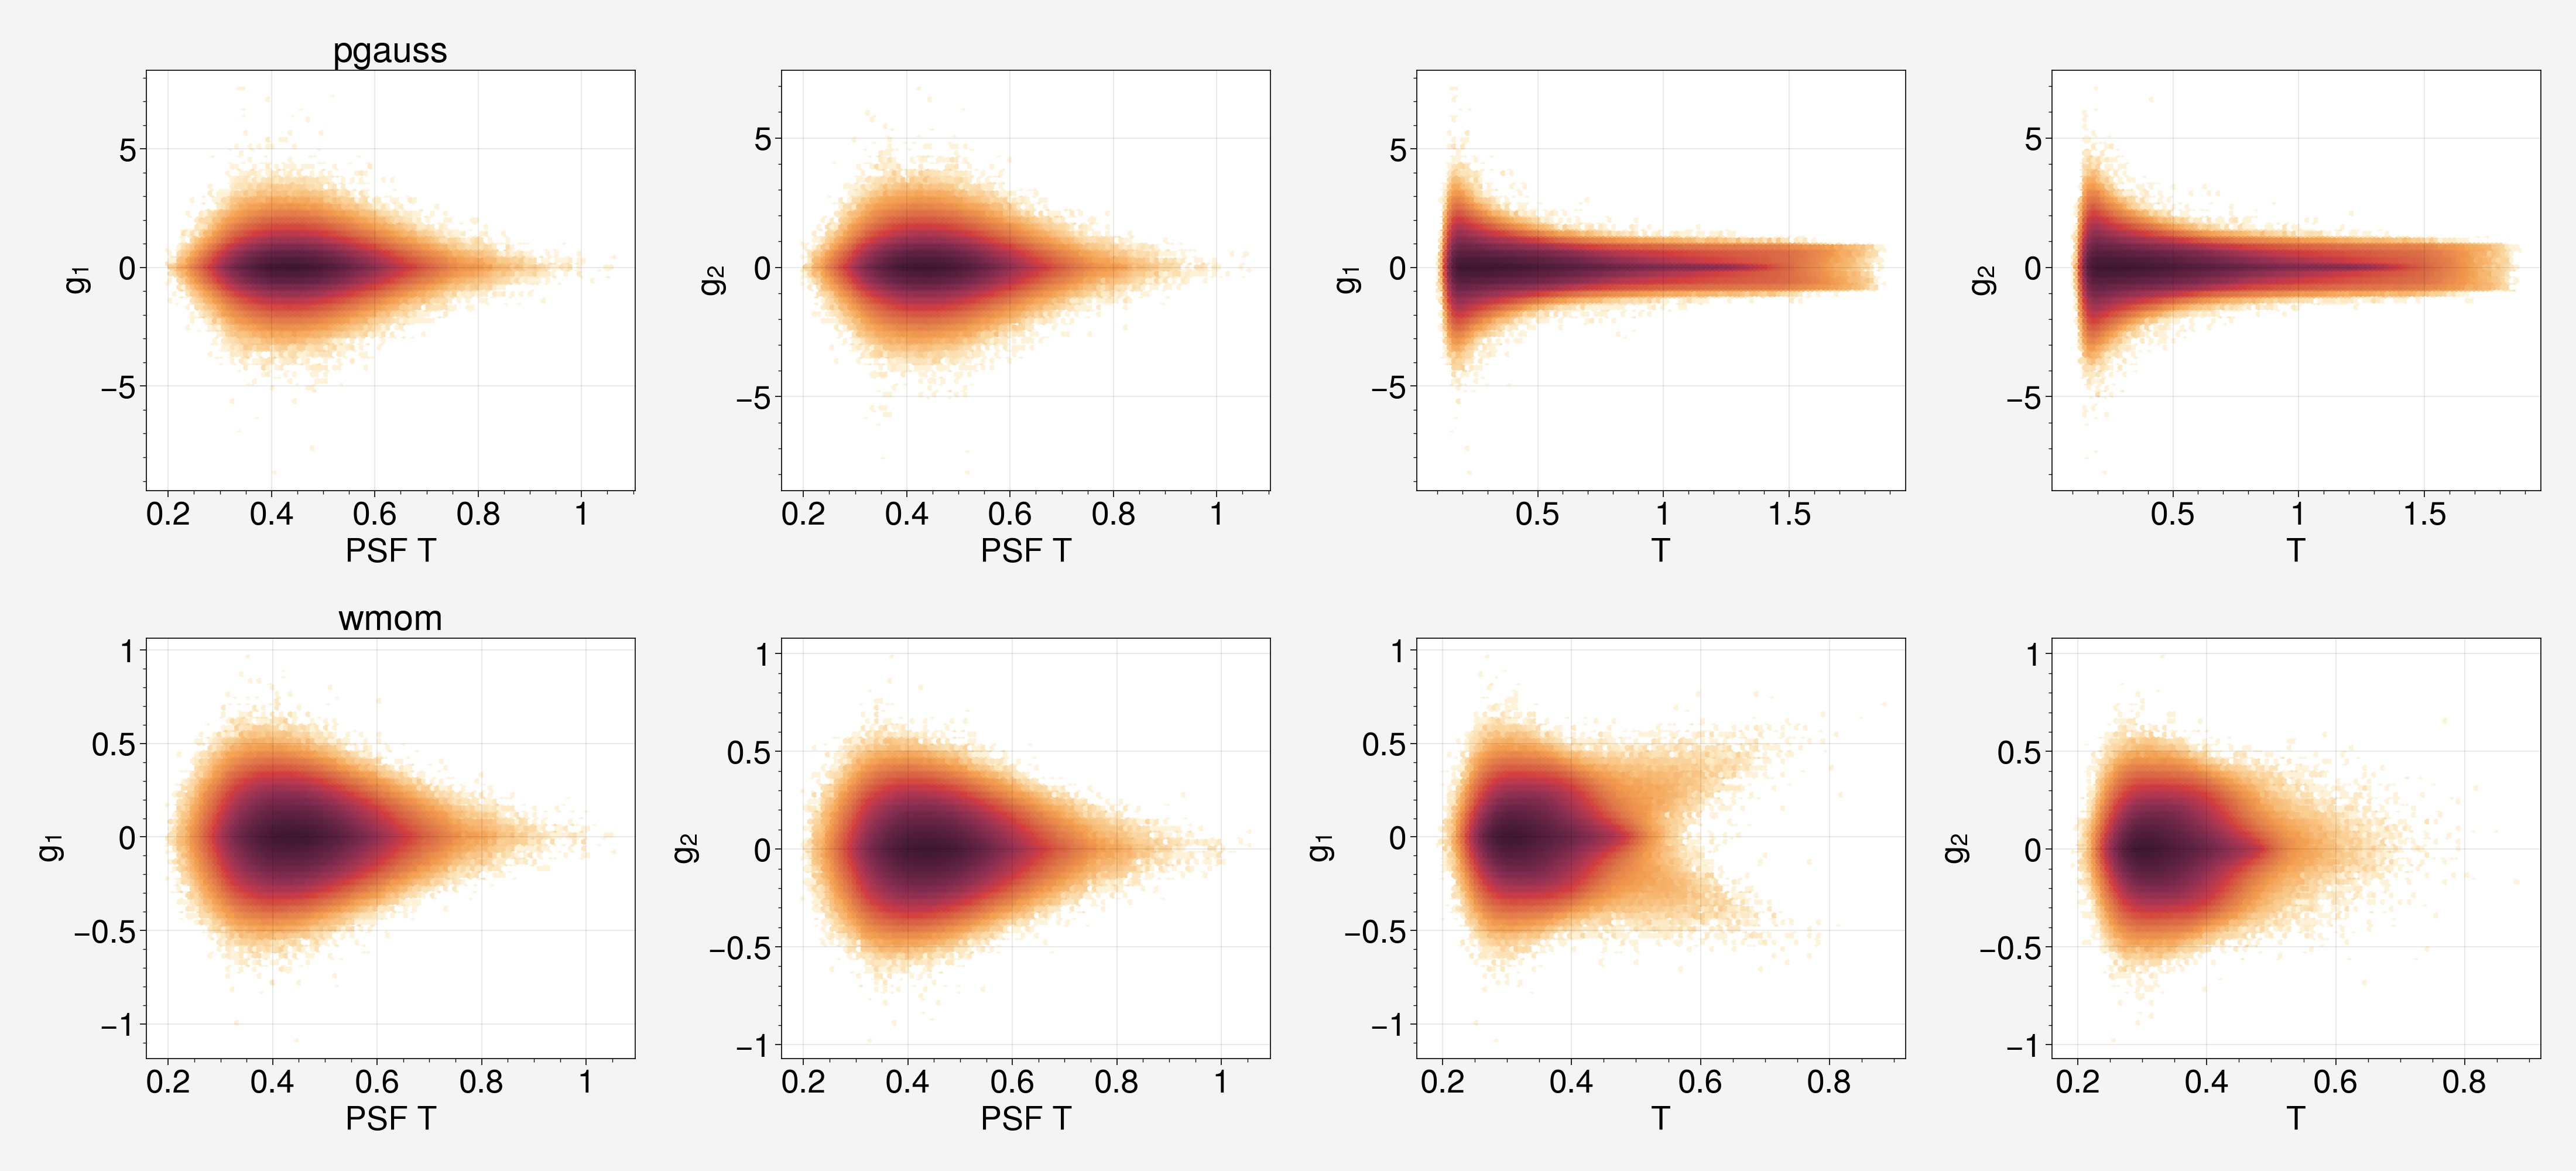

In [4]:
layout = np.arange(8).reshape(2, 4)
fig,ax = plt.subplot_mosaic(layout, figsize=(22,10))


ax[0].hexbin(d_pgauss['psfrec_T'], d_pgauss['pgauss_g_1'], gridsize=100, bins='log')
ax[0].set_xlabel(r'PSF T')
ax[0].set_ylabel(r'$g_1$')
ax[0].set_title('pgauss')

ax[1].hexbin(d_pgauss['psfrec_T'], d_pgauss['pgauss_g_2'], gridsize=100, bins='log')
ax[1].set_xlabel(r'PSF T')
ax[1].set_ylabel(r'$g_2$')

ax[2].hexbin(d_pgauss['pgauss_T'], d_pgauss['pgauss_g_1'], gridsize=100, bins='log')
ax[2].set_xlabel(r'T')
ax[2].set_ylabel(r'$g_1$')

ax[3].hexbin(d_pgauss['pgauss_T'], d_pgauss['pgauss_g_2'], gridsize=100, bins='log')
ax[3].set_xlabel(r'T')
ax[3].set_ylabel(r'$g_2$')


ax[4].hexbin(d_wmom['psfrec_T'], d_wmom['wmom_g_1'], gridsize=100, bins='log')
ax[4].set_xlabel(r'PSF T')
ax[4].set_ylabel(r'$g_1$')
ax[4].set_title('wmom')

ax[5].hexbin(d_wmom['psfrec_T'], d_wmom['wmom_g_2'], gridsize=100, bins='log')
ax[5].set_xlabel(r'PSF T')
ax[5].set_ylabel(r'$g_2$')

ax[6].hexbin(d_wmom['wmom_T'], d_wmom['wmom_g_1'], gridsize=100, bins='log')
ax[6].set_xlabel(r'T')
ax[6].set_ylabel(r'$g_1$')

ax[7].hexbin(d_wmom['wmom_T'], d_wmom['wmom_g_2'], gridsize=100, bins='log')
ax[7].set_xlabel(r'T')
ax[7].set_ylabel(r'$g_2$')


plt.tight_layout()

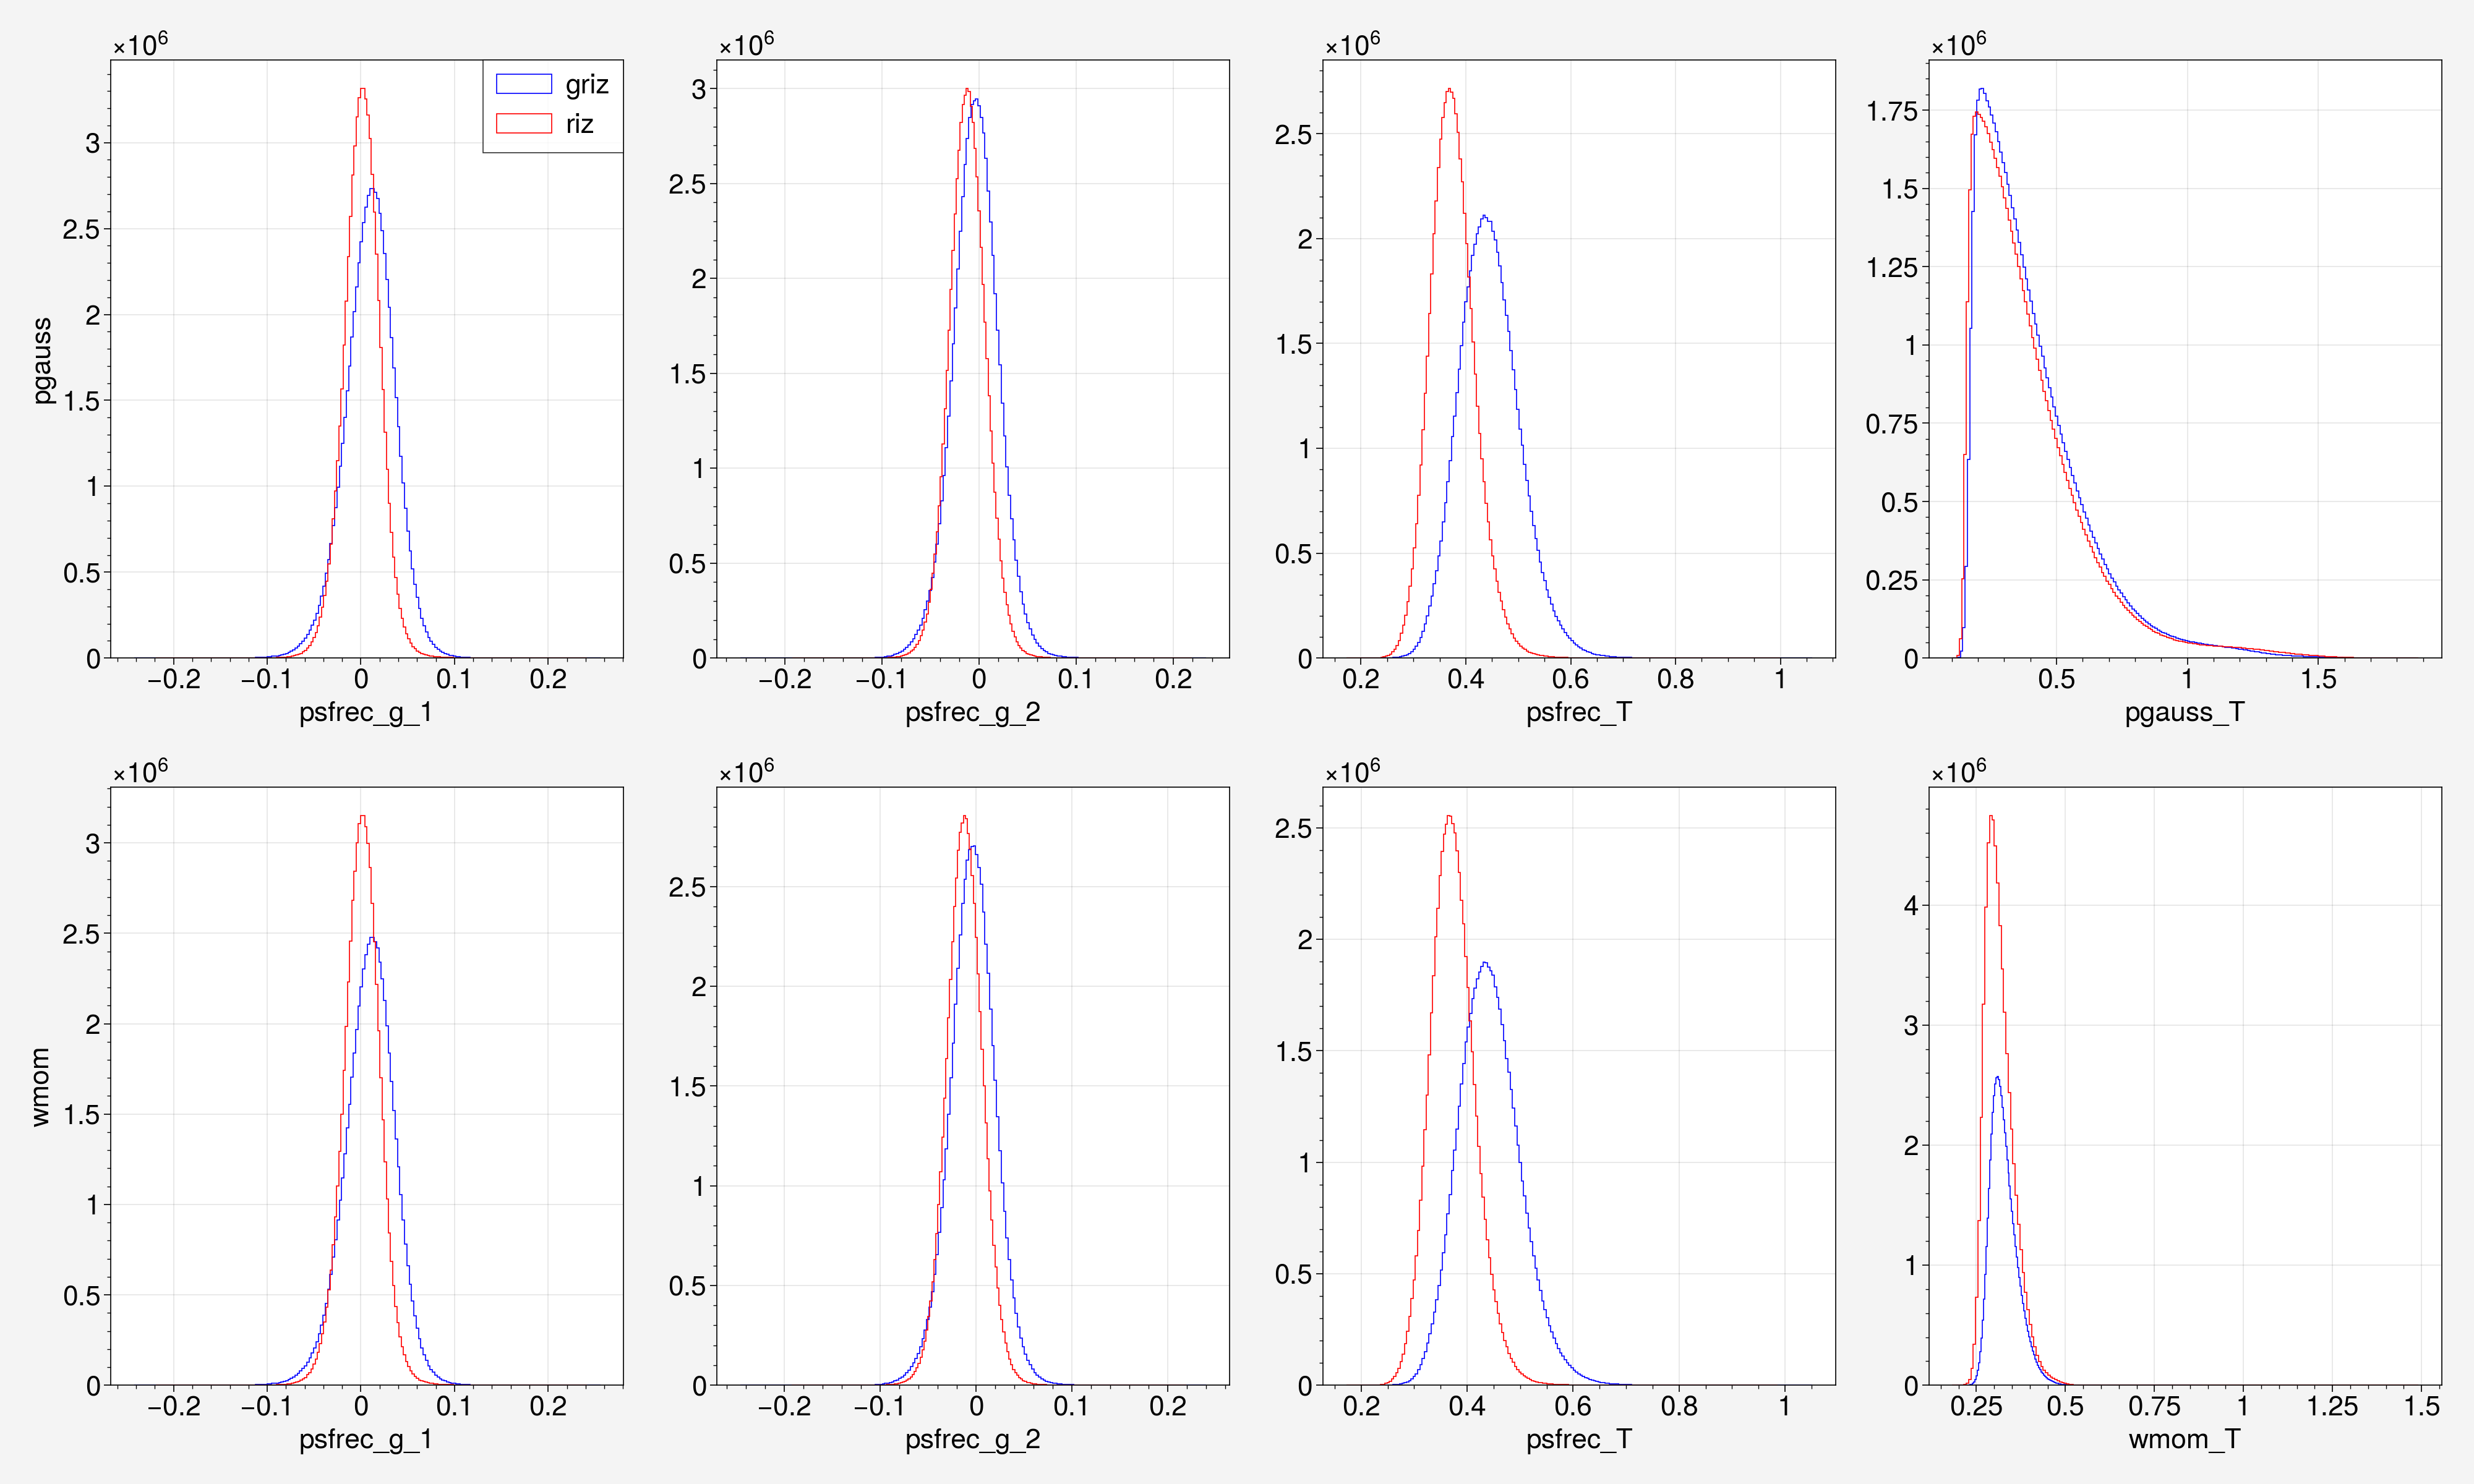

In [5]:
matplotlib.rcParams.update({'font.size': 16})
layout = np.arange(8).reshape(2, 4)
fig,ax = plt.subplot_mosaic(layout, figsize=(20,12))

ax[0].hist(d_pgauss['psfrec_g_1'], bins=200, histtype='step', color='b', label='griz')
ax[0].hist(d_pgauss_riz['psfrec_g_1'], bins=200, histtype='step', color='r', label='riz')
ax[0].set_xlabel('psfrec_g_1')
ax[0].set_ylabel('pgauss')
ax[0].legend()

ax[1].hist(d_pgauss['psfrec_g_2'], bins=200, histtype='step', color='b')
ax[1].hist(d_pgauss_riz['psfrec_g_2'], bins=200, histtype='step', color='r')
ax[1].set_xlabel('psfrec_g_2')

ax[2].hist(d_pgauss['psfrec_T'], bins=200, histtype='step', color='b')
ax[2].hist(d_pgauss_riz['psfrec_T'], bins=200, histtype='step', color='r')
ax[2].set_xlabel('psfrec_T')

ax[3].hist(d_pgauss['pgauss_T'], bins=200, histtype='step', color='b')
ax[3].hist(d_pgauss_riz['pgauss_T'], bins=200, histtype='step', color='r')
ax[3].set_xlabel('pgauss_T')

ax[4].hist(d_wmom['psfrec_g_1'], bins=200, histtype='step', color='b', label='griz')
ax[4].hist(d_wmom_riz['psfrec_g_1'], bins=200, histtype='step', color='r', label='riz')
ax[4].set_xlabel('psfrec_g_1')
ax[4].set_ylabel('wmom')

ax[5].hist(d_wmom['psfrec_g_2'], bins=200, histtype='step', color='b')
ax[5].hist(d_wmom_riz['psfrec_g_2'], bins=200, histtype='step', color='r')
ax[5].set_xlabel('psfrec_g_2')

ax[6].hist(d_wmom['psfrec_T'], bins=200, histtype='step', color='b')
ax[6].hist(d_wmom_riz['psfrec_T'], bins=200, histtype='step', color='r')
ax[6].set_xlabel('psfrec_T')

ax[7].hist(d_wmom['wmom_T'], bins=200, histtype='step', color='b')
ax[7].hist(d_wmom_riz['wmom_T'], bins=200, histtype='step', color='r')
ax[7].set_xlabel('wmom_T')

plt.tight_layout()

Text(0, 0.5, 'wmom')

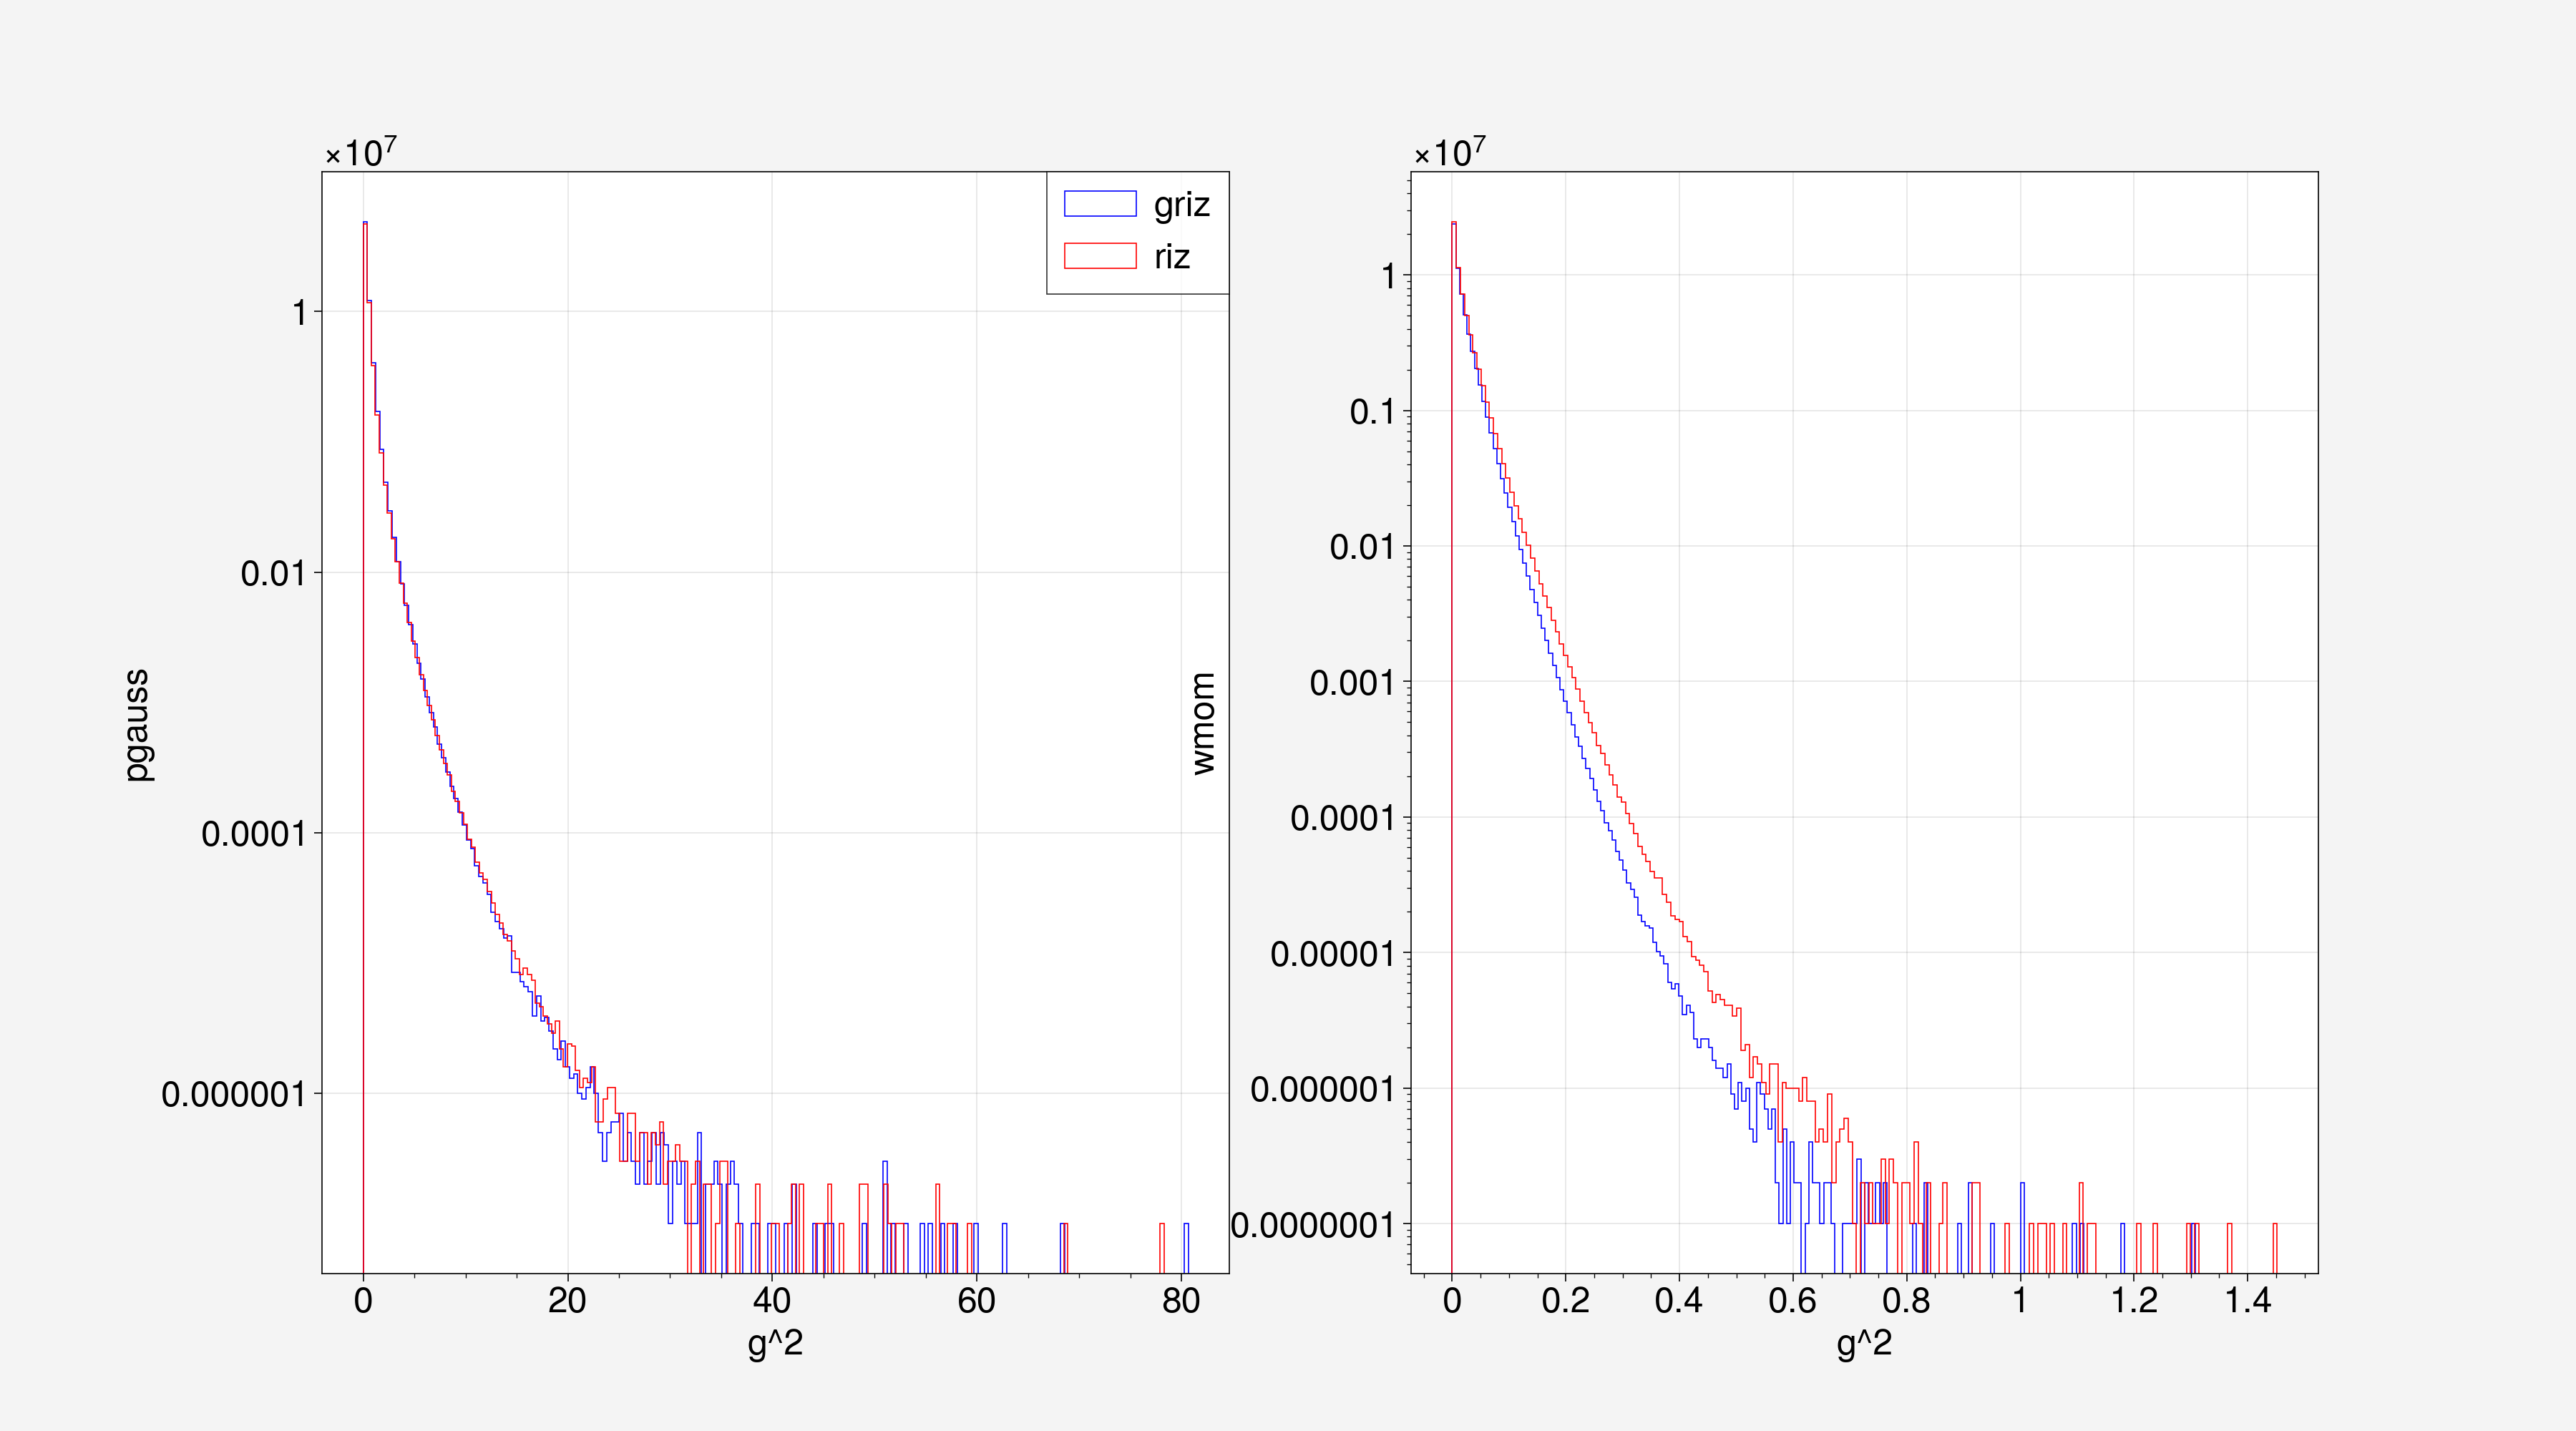

In [6]:
matplotlib.rcParams.update({'font.size': 18})
layout = np.arange(2).reshape(1, 2)
fig,ax = plt.subplot_mosaic(layout, figsize=(18,10))

gsq_pgauss = (d_pgauss['pgauss_g_1']**2 + d_pgauss['pgauss_g_2']**2)
gsq_pgauss_riz = (d_pgauss_riz['pgauss_g_1']**2 + d_pgauss_riz['pgauss_g_2']**2)
ax[0].hist(gsq_pgauss, bins=200, histtype='step', color='b', label='griz')
ax[0].hist(gsq_pgauss_riz, bins=200, histtype='step', color='r', label='riz')
ax[0].set_yscale('log')
ax[0].set_xlabel('g^2')
ax[0].set_ylabel('pgauss')
ax[0].legend()

gsq_wmom = (d_wmom['wmom_g_1']**2 + d_wmom['wmom_g_2']**2)
gsq_wmom_riz = (d_wmom_riz['wmom_g_1']**2 + d_wmom_riz['wmom_g_2']**2)
ax[1].hist(gsq_wmom, bins=200, histtype='step', color='b', label='griz')
ax[1].hist(gsq_wmom_riz, bins=200, histtype='step', color='r', label='riz')
ax[1].set_yscale('log')
ax[1].set_xlabel('g^2')
ax[1].set_ylabel('wmom')

Text(0.5, 0, 'wmom_T (riz)')

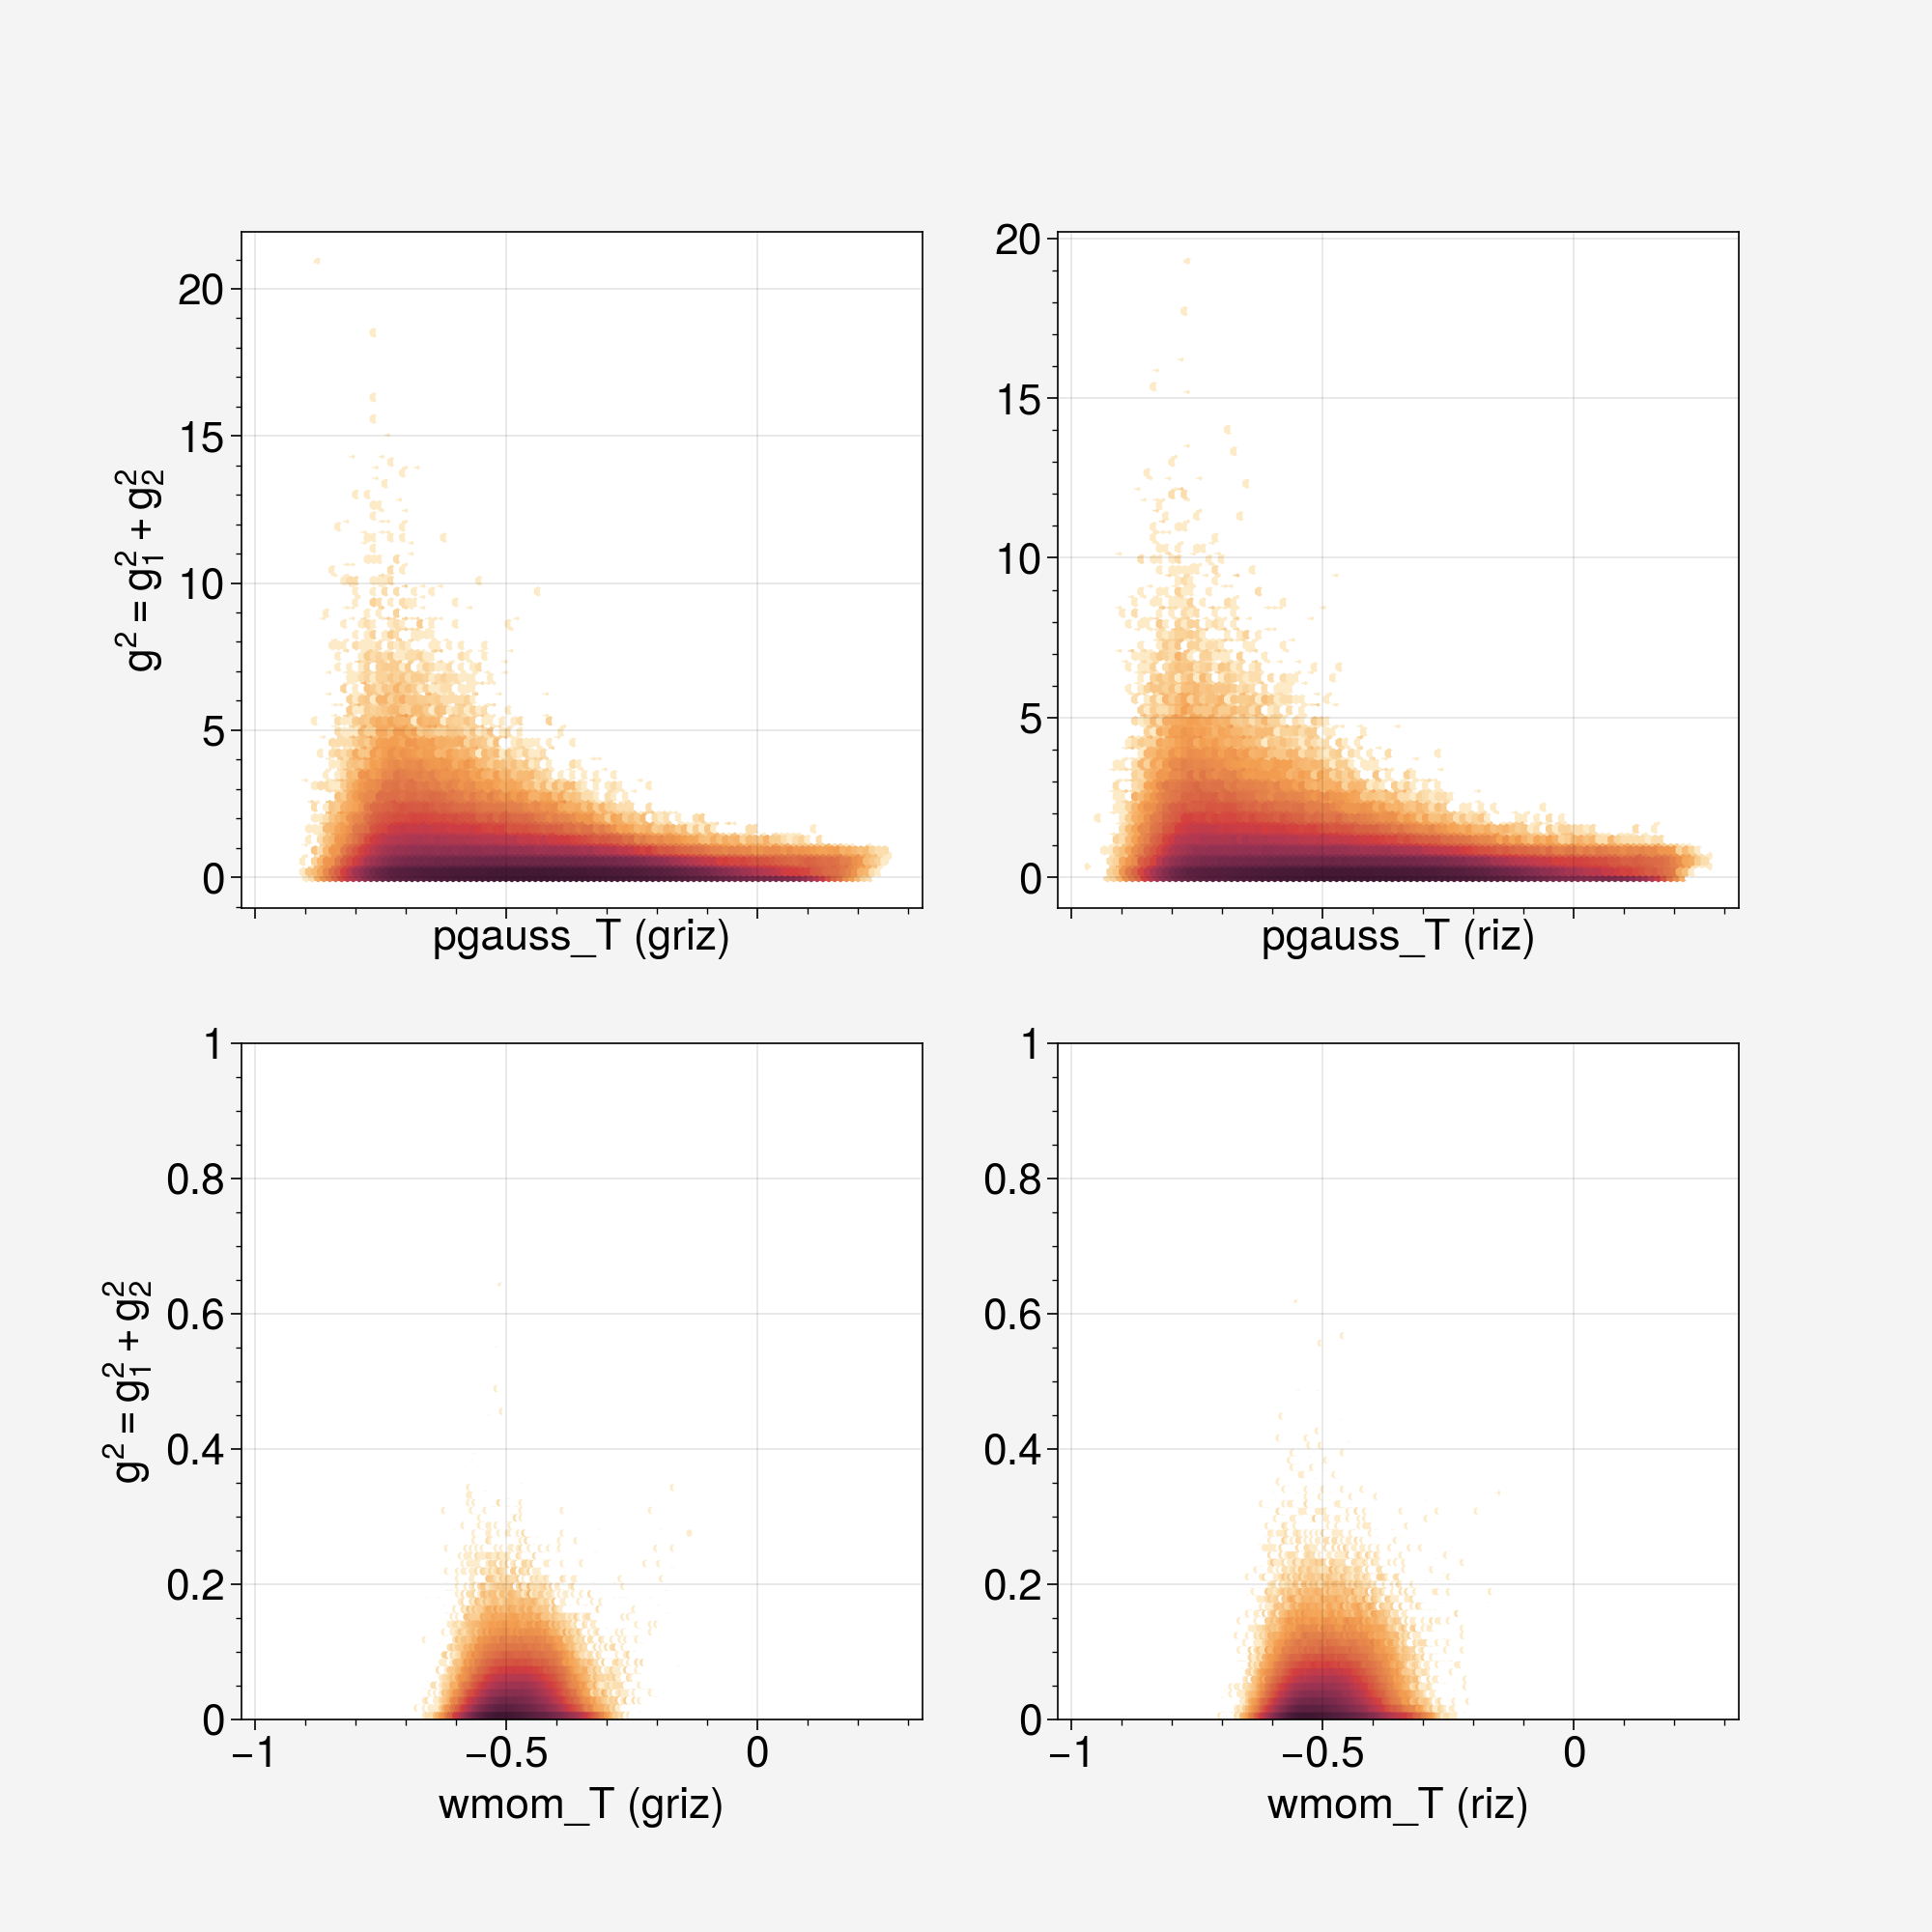

In [7]:
matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharey=False, sharex=True)
lim = 1000000
ax2[0,0].hexbin(np.log10(d_pgauss['pgauss_T'][:lim]),gsq_pgauss[:lim], bins='log')
ax2[0,0].set_xlabel('pgauss_T (griz)')
ax2[0,0].set_ylabel(r'$g^2 = g_1^2 + g_2^2$')

ax2[0,1].hexbin(np.log10(d_pgauss_riz['pgauss_T'][:lim]),gsq_pgauss_riz[:lim], bins='log')
ax2[0,1].set_xlabel('pgauss_T (riz)')

ax2[1,0].hexbin(np.log10(d_wmom['wmom_T'][:lim]),gsq_wmom[:lim], bins='log')
ax2[1,0].set_ylim(0,1)
ax2[1,0].set_xlabel('wmom_T (griz)')
ax2[1,0].set_ylabel(r'$g^2 = g_1^2 + g_2^2$')

ax2[1,1].hexbin(np.log10(d_wmom_riz['wmom_T'][:lim]),gsq_wmom_riz[:lim], bins='log')
ax2[1,1].set_ylim(0,1)
ax2[1,1].set_xlabel('wmom_T (riz)')

In [ ]:
np.mean(d_pgauss['pgauss_T']<0.25)

In [ ]:
print(len(d_pgauss), len(d_pgauss_riz))

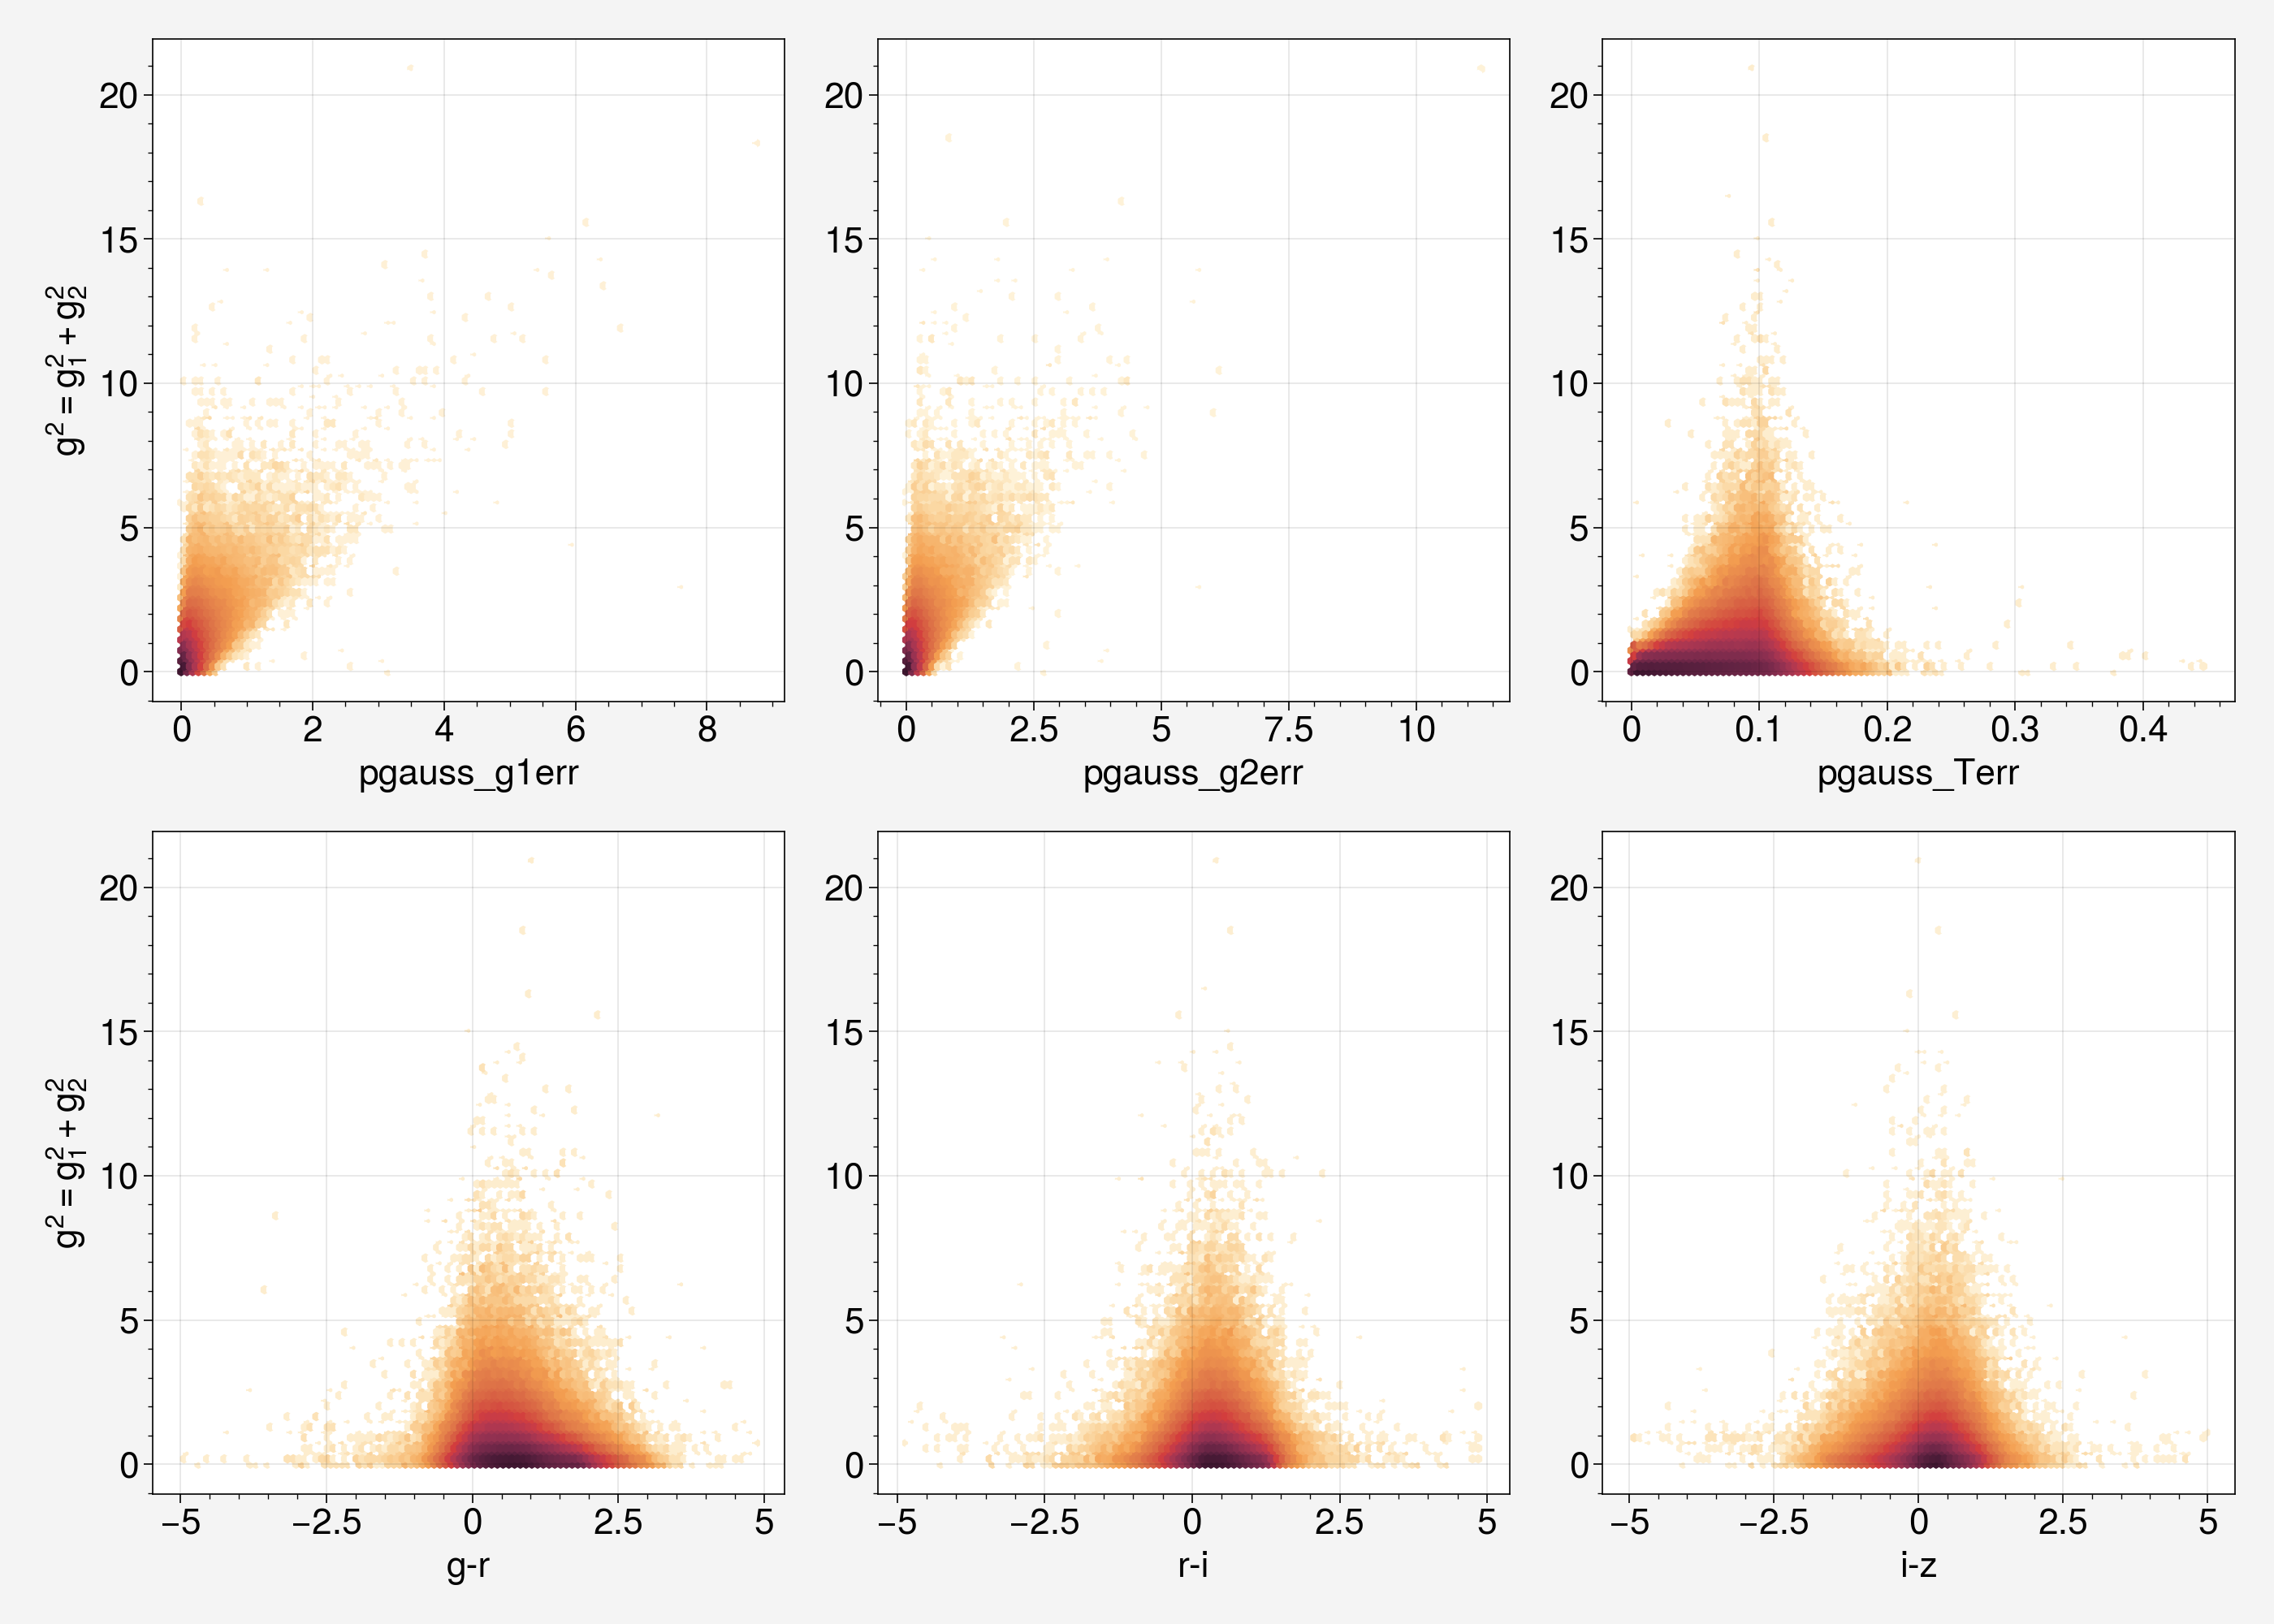

In [18]:
matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=2, ncols=3, figsize=(14,10), sharey=False, sharex=False)
lim = 1000000
ax2[0,0].hexbin(d_pgauss['pgauss_g_cov_1_1'][:lim],gsq_pgauss[:lim], bins='log')
ax2[0,0].set_xlabel('pgauss_g1err')
ax2[0,0].set_ylabel(r'$g^2 = g_1^2 + g_2^2$')

ax2[0,1].hexbin(d_pgauss['pgauss_g_cov_2_2'][:lim],gsq_pgauss[:lim], bins='log')
ax2[0,1].set_xlabel('pgauss_g2err')

ax2[0,2].hexbin(d_pgauss['pgauss_T_err'][:lim],gsq_pgauss[:lim], bins='log')
ax2[0,2].set_xlabel('pgauss_Terr')

ax2[1,0].hexbin(d_pgauss['g-r'][:lim],gsq_pgauss[:lim], bins='log')
ax2[1,0].set_xlabel('g-r')
ax2[1,0].set_ylabel(r'$g^2 = g_1^2 + g_2^2$')

ax2[1,1].hexbin(d_pgauss['r-i'][:lim],gsq_pgauss[:lim], bins='log')
ax2[1,1].set_xlabel('r-i')

ax2[1,2].hexbin(d_pgauss['i-z'][:lim],gsq_pgauss[:lim], bins='log')
ax2[1,2].set_xlabel('i-z')

plt.tight_layout()
plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/pgauss_shape_err_color.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'riz')

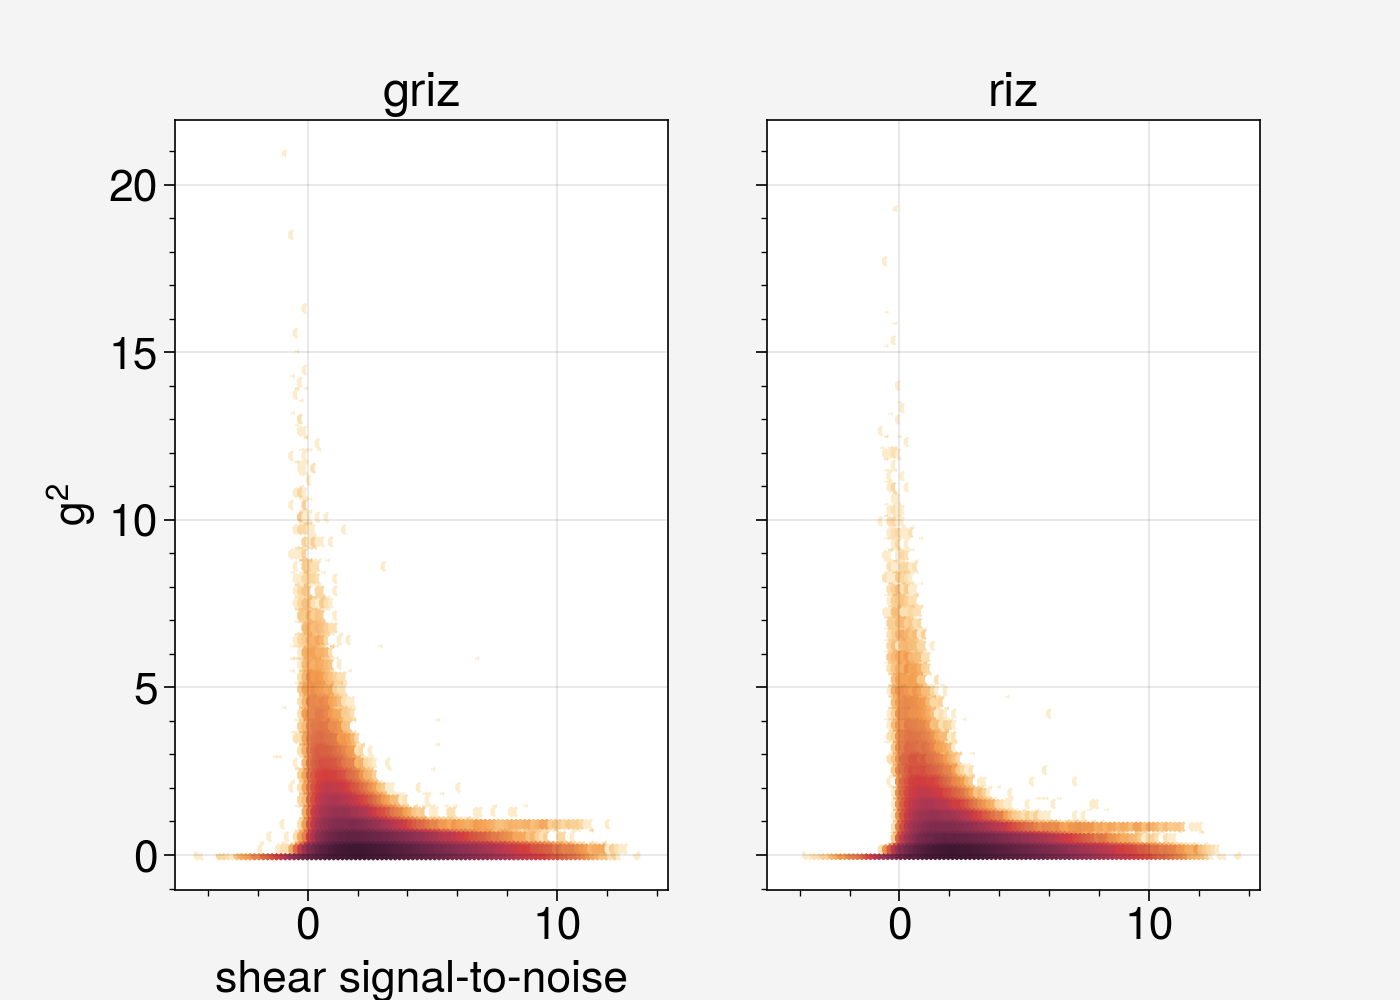

In [29]:
lim = 1000000
s2n_griz = np.log10(gsq_pgauss[:lim] / (d_pgauss['pgauss_g_cov_1_1'][:lim]**2 + d_pgauss['pgauss_g_cov_2_2'][:lim]**2))
s2n_riz = np.log10(gsq_pgauss_riz[:lim] / (d_pgauss_riz['pgauss_g_cov_1_1'][:lim]**2 + d_pgauss_riz['pgauss_g_cov_2_2'][:lim]**2))


matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=1, ncols=2, figsize=(7,5), sharey=True, sharex=True)
ax2[0].hexbin(s2n_griz,gsq_pgauss[:lim], bins='log')
ax2[0].set_xlabel('shear signal-to-noise')
ax2[0].set_ylabel(r'$g^2$')
ax2[0].set_title('griz')

ax2[1].hexbin(s2n_riz,gsq_pgauss_riz[:lim], bins='log')
ax2[1].set_title('riz')

In [31]:
np.mean(s2n_griz < 0), np.mean(s2n_griz < 1)

(0.015218, 0.149845)

In [32]:
np.mean(s2n_riz < 0), np.mean(s2n_riz < 1)

(0.012378, 0.127276)

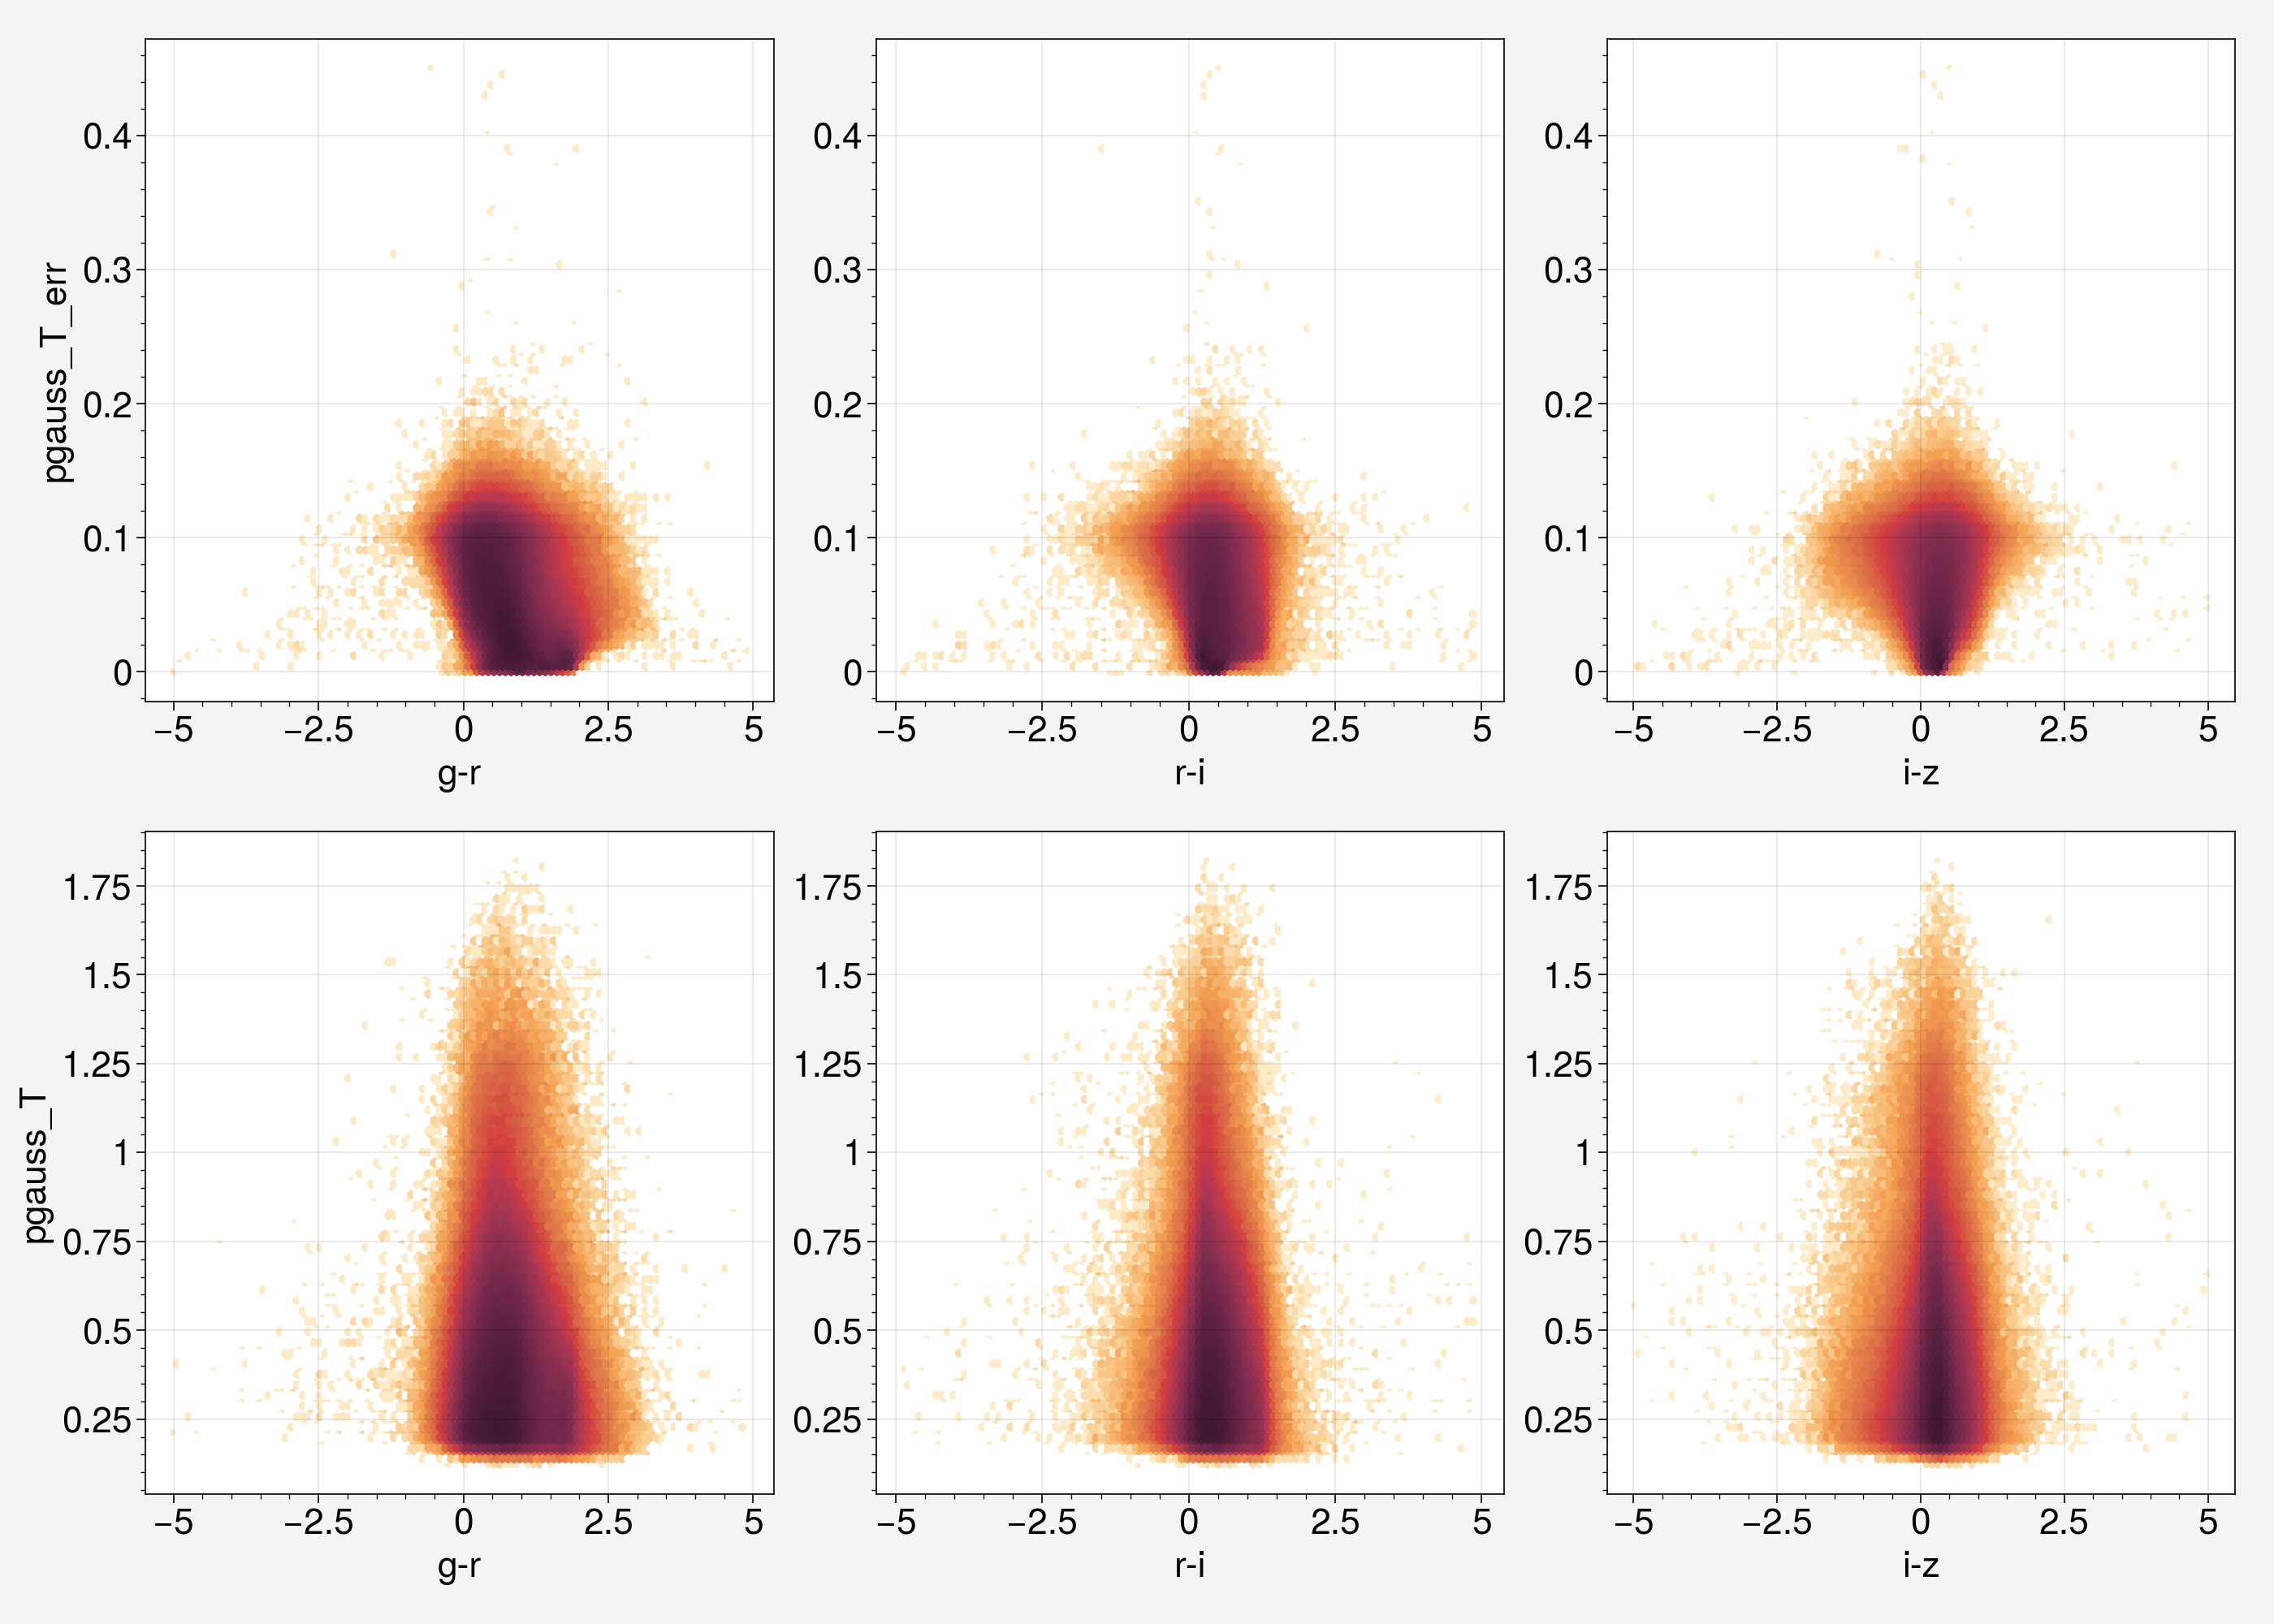

In [20]:
matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=2, ncols=3, figsize=(14,10), sharey=False, sharex=False)
lim = 1000000
ax2[0,0].hexbin(d_pgauss['g-r'][:lim],d_pgauss['pgauss_T_err'][:lim], bins='log')
ax2[0,0].set_xlabel('g-r')
ax2[0,0].set_ylabel(r'pgauss_T_err')

ax2[0,1].hexbin(d_pgauss['r-i'][:lim],d_pgauss['pgauss_T_err'][:lim], bins='log')
ax2[0,1].set_xlabel('r-i')

ax2[0,2].hexbin(d_pgauss['i-z'][:lim],d_pgauss['pgauss_T_err'][:lim], bins='log')
ax2[0,2].set_xlabel('i-z')

ax2[1,0].hexbin(d_pgauss['g-r'][:lim],d_pgauss['pgauss_T'][:lim], bins='log')
ax2[1,0].set_xlabel('g-r')
ax2[1,0].set_ylabel(r'pgauss_T')

ax2[1,1].hexbin(d_pgauss['r-i'][:lim],d_pgauss['pgauss_T'][:lim], bins='log')
ax2[1,1].set_xlabel('r-i')

ax2[1,2].hexbin(d_pgauss['i-z'][:lim],d_pgauss['pgauss_T'][:lim], bins='log')
ax2[1,2].set_xlabel('i-z')

plt.tight_layout()

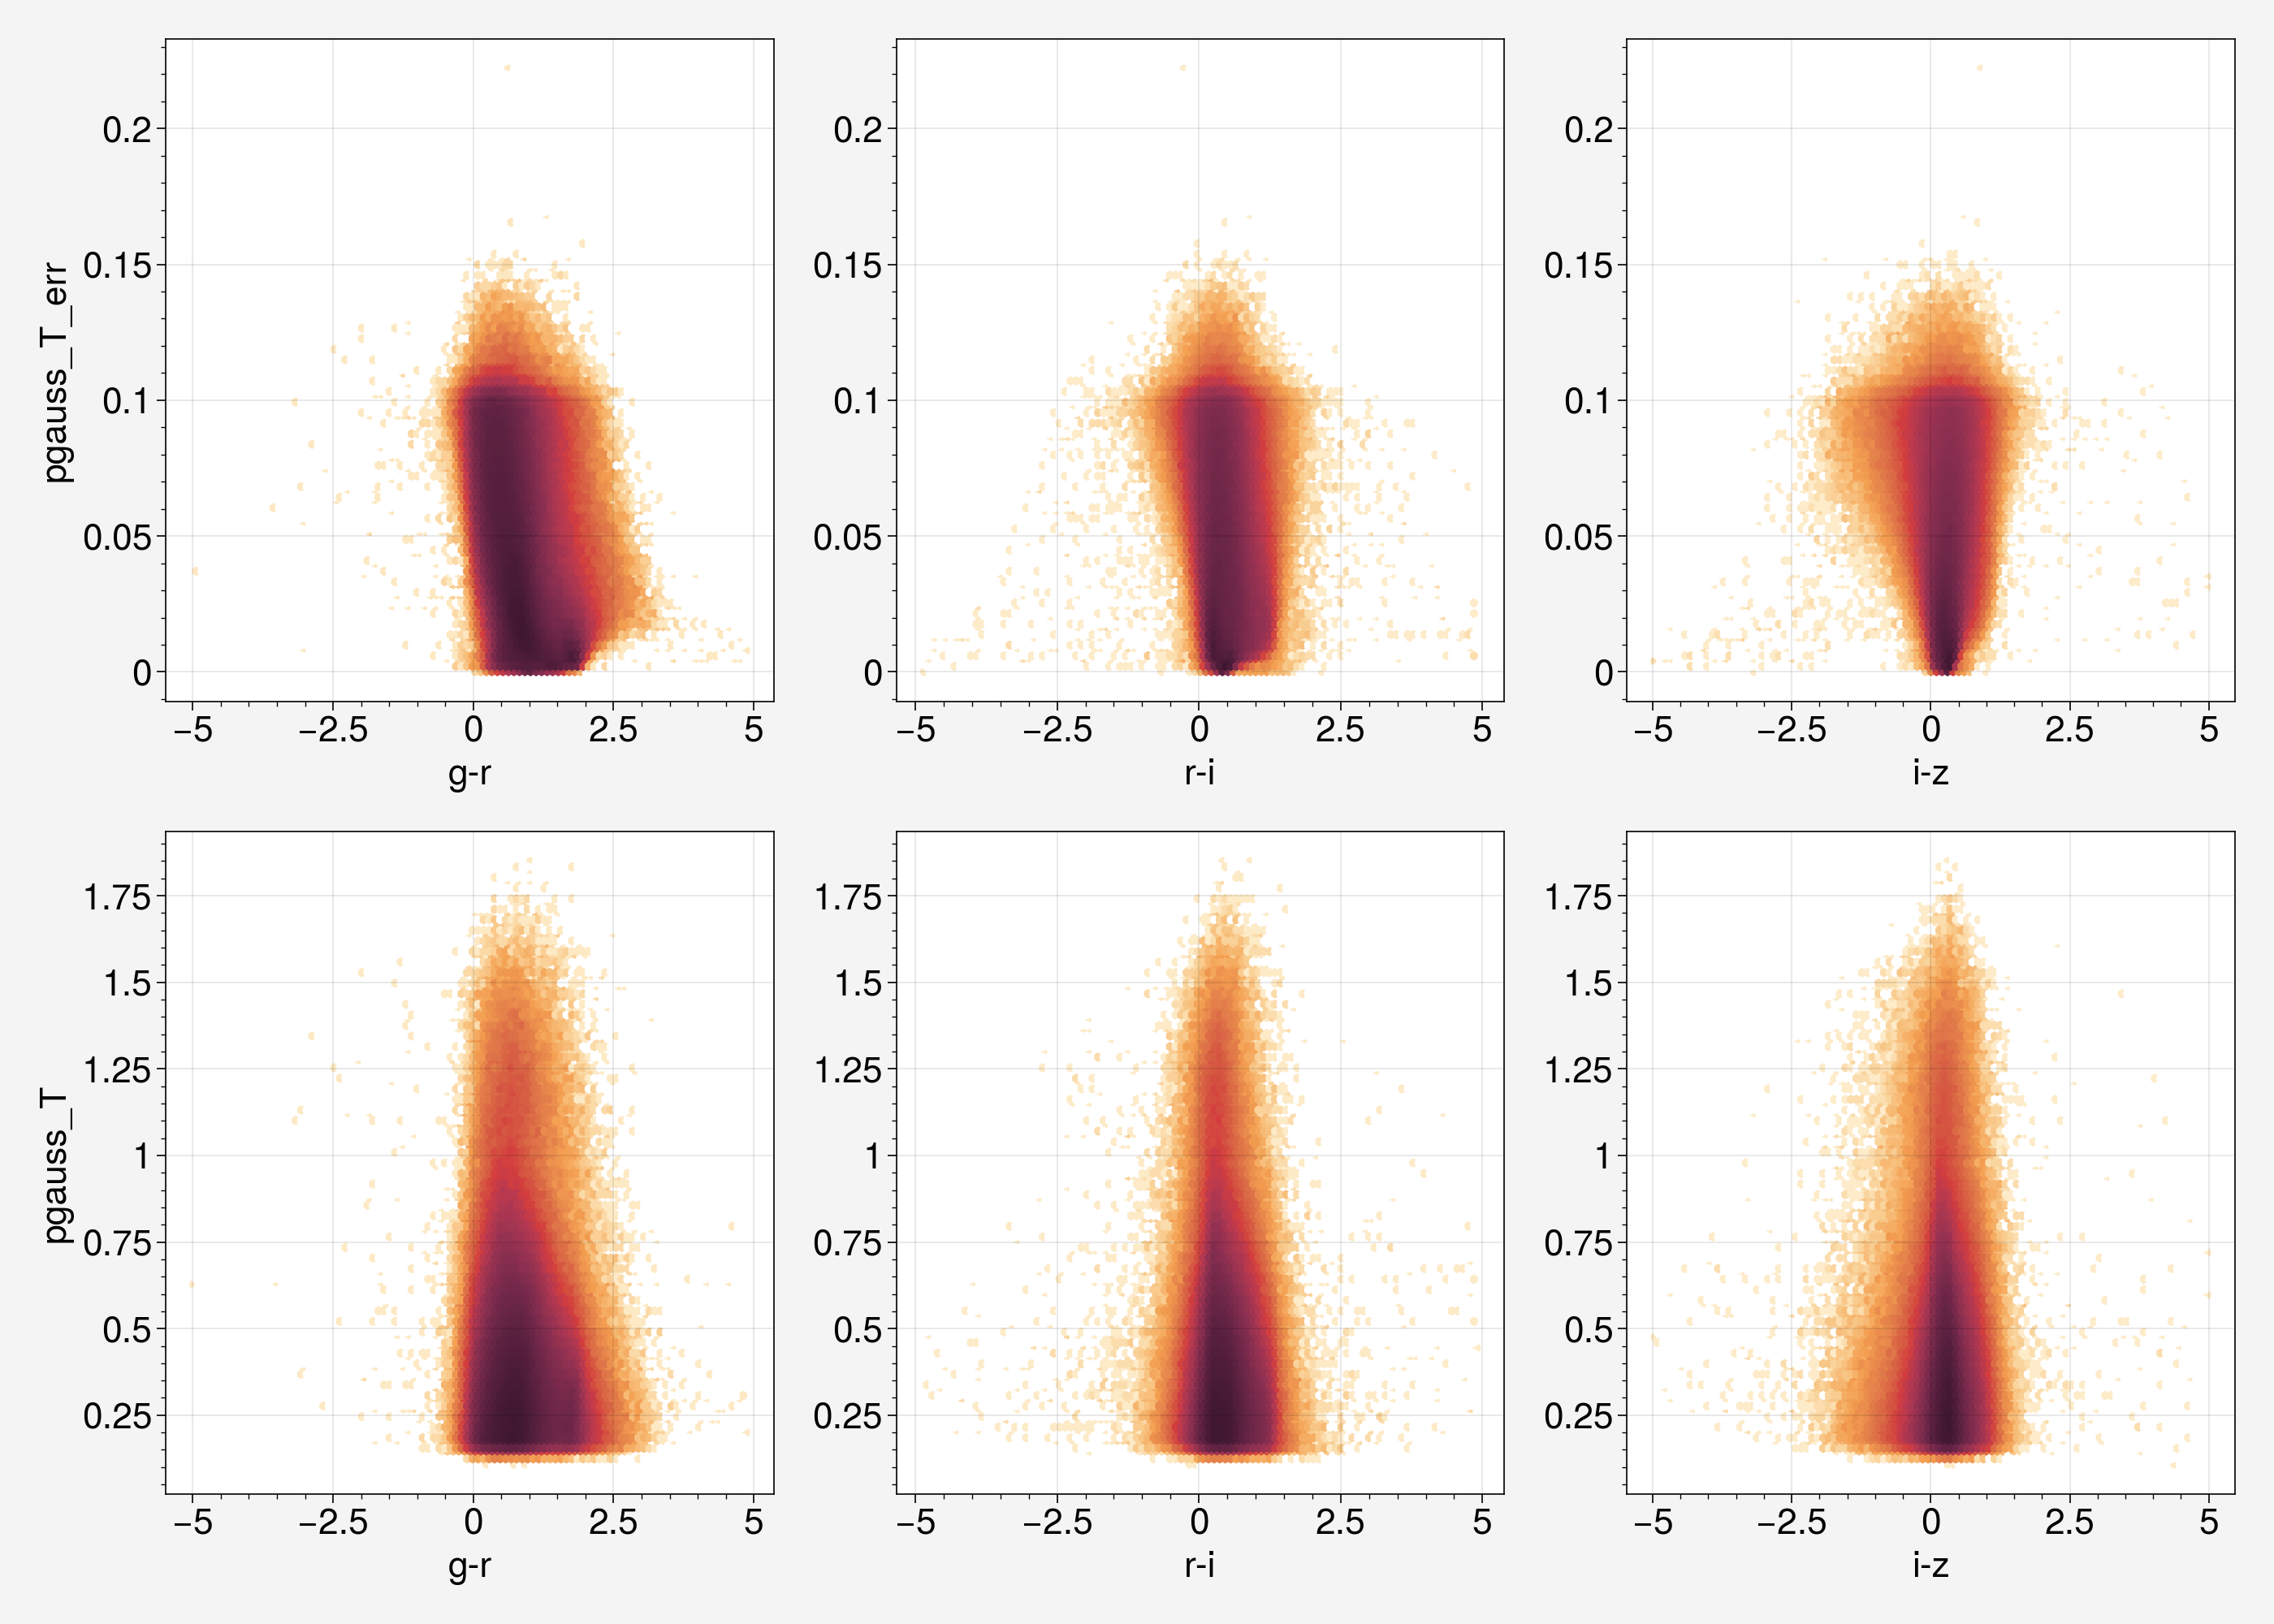

In [26]:
matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=2, ncols=3, figsize=(14,10), sharey=False, sharex=False)
lim = 1000000
ax2[0,0].hexbin(d_pgauss_riz['g-r'][:lim],d_pgauss_riz['pgauss_T_err'][:lim], bins='log')
ax2[0,0].set_xlabel('g-r')
ax2[0,0].set_ylabel(r'pgauss_T_err')

ax2[0,1].hexbin(d_pgauss_riz['r-i'][:lim],d_pgauss_riz['pgauss_T_err'][:lim], bins='log')
ax2[0,1].set_xlabel('r-i')

ax2[0,2].hexbin(d_pgauss_riz['i-z'][:lim],d_pgauss_riz['pgauss_T_err'][:lim], bins='log')
ax2[0,2].set_xlabel('i-z')

ax2[1,0].hexbin(d_pgauss_riz['g-r'][:lim],d_pgauss_riz['pgauss_T'][:lim], bins='log')
ax2[1,0].set_xlabel('g-r')
ax2[1,0].set_ylabel(r'pgauss_T')

ax2[1,1].hexbin(d_pgauss_riz['r-i'][:lim],d_pgauss_riz['pgauss_T'][:lim], bins='log')
ax2[1,1].set_xlabel('r-i')

ax2[1,2].hexbin(d_pgauss_riz['i-z'][:lim],d_pgauss_riz['pgauss_T'][:lim], bins='log')
ax2[1,2].set_xlabel('i-z')

plt.tight_layout()

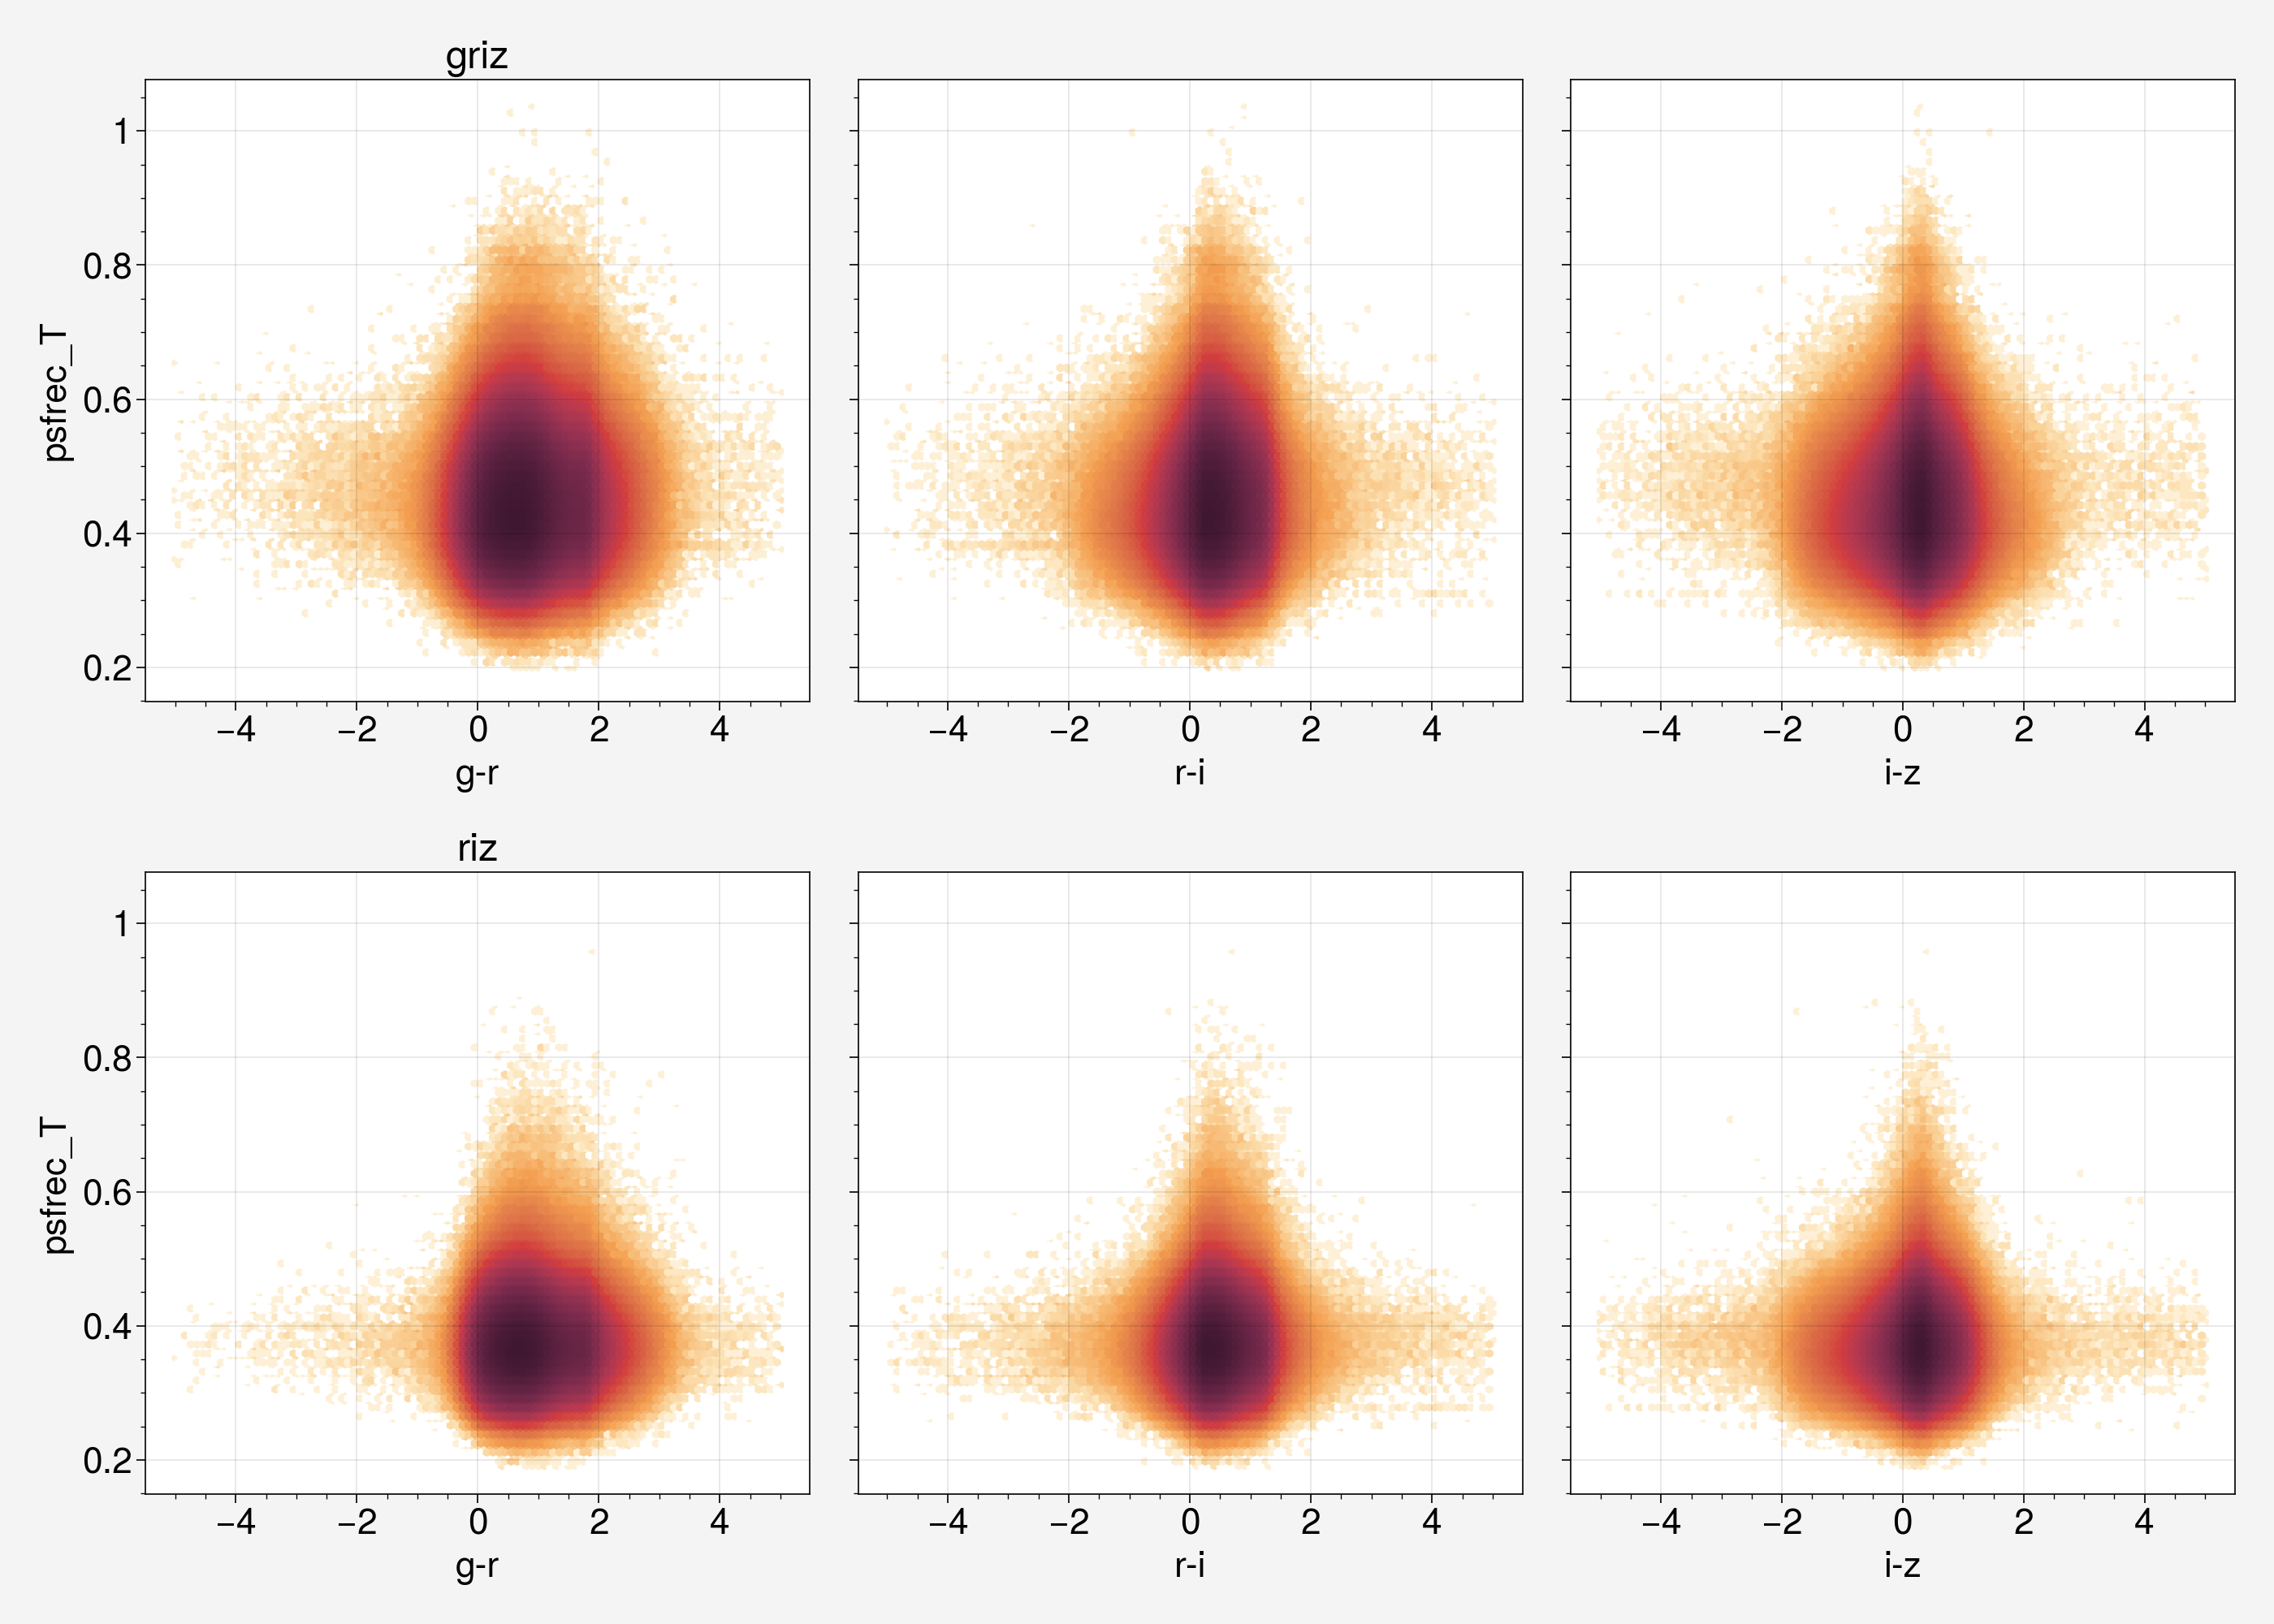

In [7]:
matplotlib.rcParams.update({'font.size': 16})
fig,ax2=plt.subplots(nrows=2, ncols=3, figsize=(14,10), sharey=True, sharex=False)
lim1 = len(d_pgauss)
lim2 = len(d_pgauss_riz)
ax2[0,0].hexbin(d_pgauss['g-r'][:lim1],d_pgauss['psfrec_T'][:lim1], bins='log')
ax2[0,0].set_xlabel('g-r')
ax2[0,0].set_ylabel(r'psfrec_T')
ax2[0,0].set_title('griz')

ax2[0,1].hexbin(d_pgauss['r-i'][:lim1],d_pgauss['psfrec_T'][:lim1], bins='log')
ax2[0,1].set_xlabel('r-i')

ax2[0,2].hexbin(d_pgauss['i-z'][:lim1],d_pgauss['psfrec_T'][:lim1], bins='log')
ax2[0,2].set_xlabel('i-z')

ax2[1,0].hexbin(d_pgauss_riz['g-r'][:lim2],d_pgauss_riz['psfrec_T'][:lim2], bins='log')
ax2[1,0].set_xlabel('g-r')
ax2[1,0].set_ylabel(r'psfrec_T')
ax2[1,0].set_title('riz')

ax2[1,1].hexbin(d_pgauss_riz['r-i'][:lim2],d_pgauss_riz['psfrec_T'][:lim2], bins='log')
ax2[1,1].set_xlabel('r-i')

ax2[1,2].hexbin(d_pgauss_riz['i-z'][:lim2],d_pgauss_riz['psfrec_T'][:lim2], bins='log')
ax2[1,2].set_xlabel('i-z')

plt.tight_layout()
plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/pgauss_griz_riz_color.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'riz')

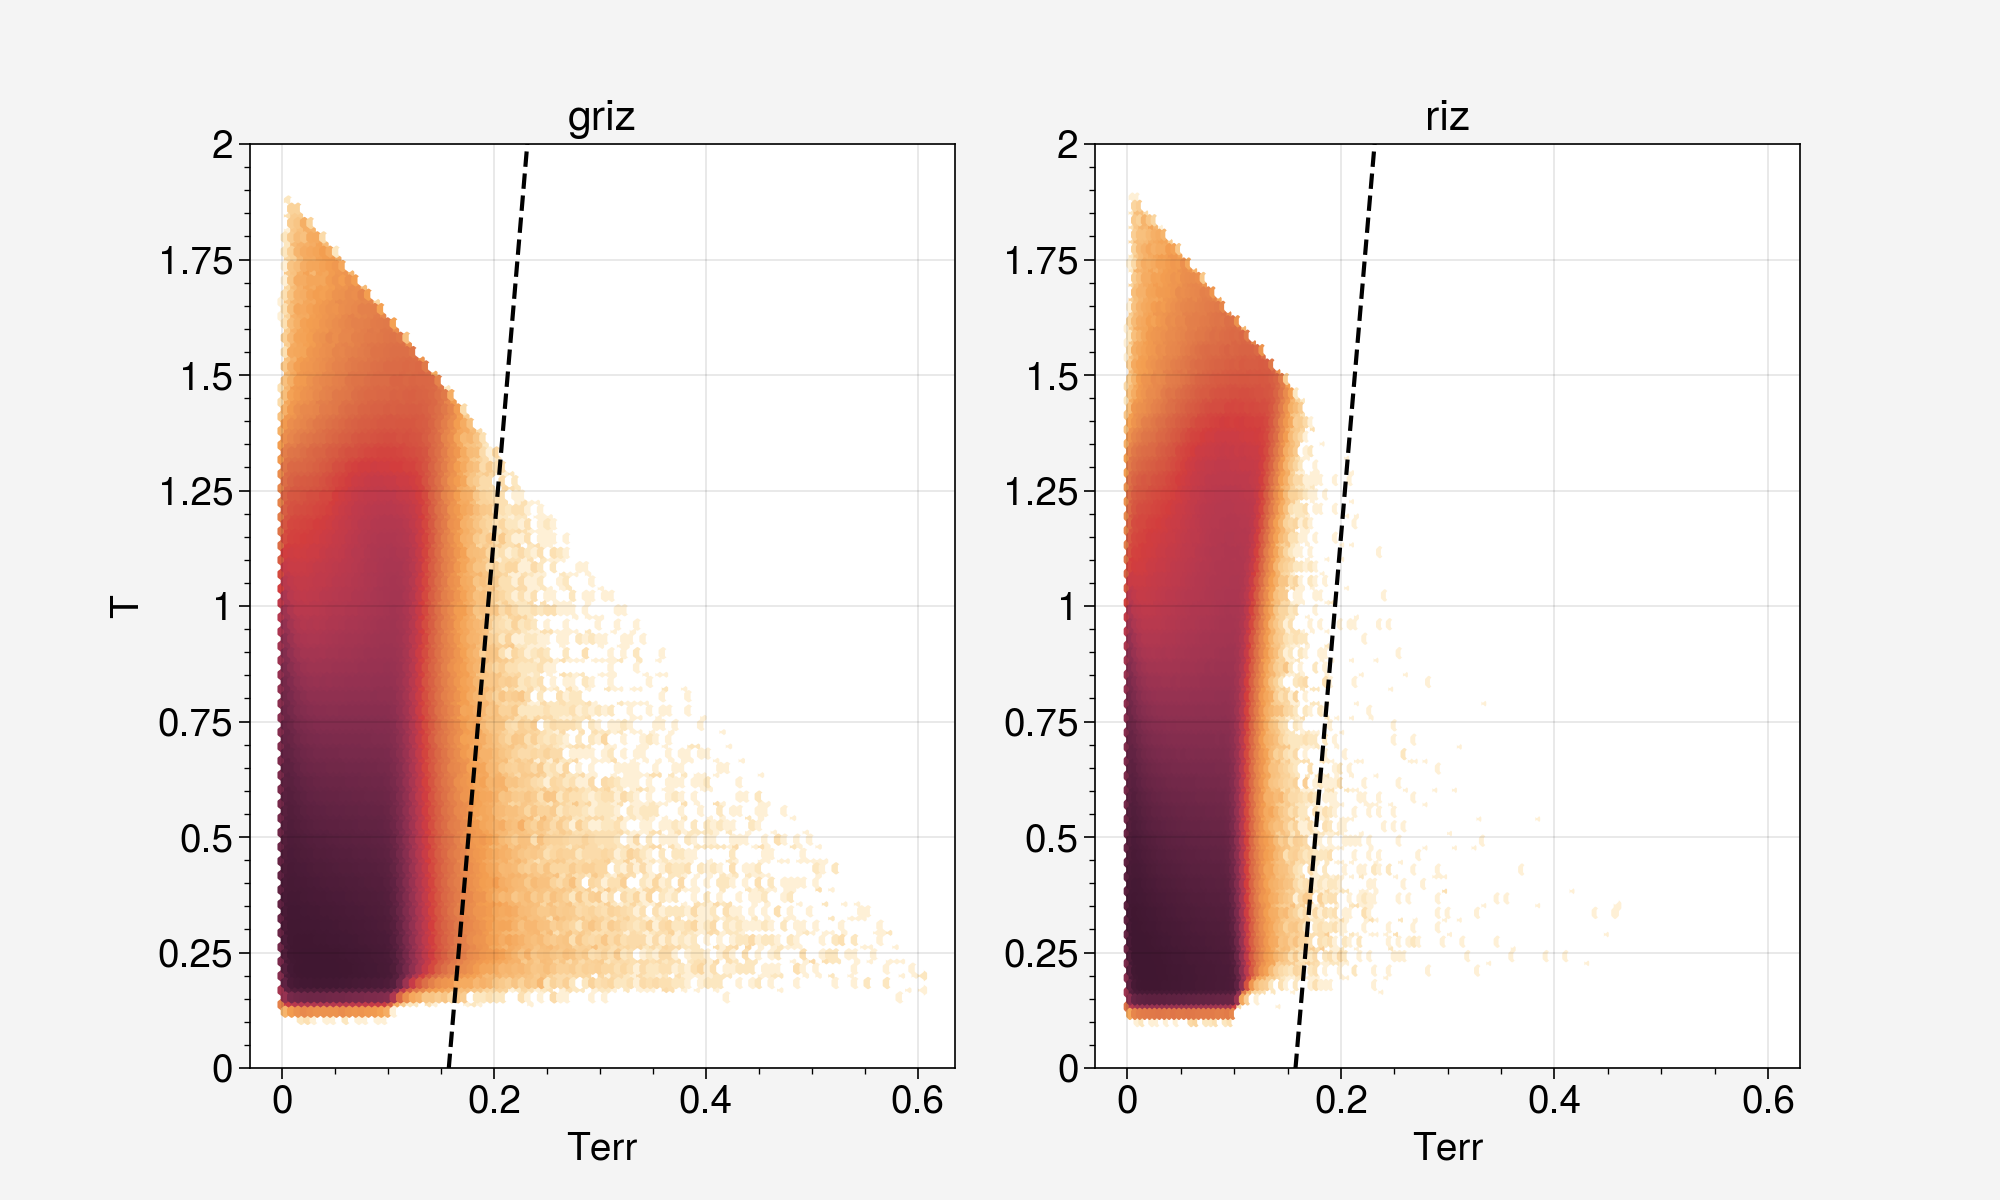

In [40]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax2=plt.subplots(nrows=1, ncols=2, figsize=(10,6))
x=np.linspace(0,0.6,100)
ax2[0].hexbin(d_pgauss['pgauss_T_err'], d_pgauss['pgauss_T'], gridsize=100, bins='log')
ax2[0].plot(x, -4.25+27*x, ls='--', c='k')
ax2[0].set_ylim(0,2.0)

ax2[1].hexbin(d_pgauss_riz['pgauss_T_err'], d_pgauss_riz['pgauss_T'], gridsize=100, bins='log')
ax2[1].plot(x, -4.25+27*x, ls='--', c='k')
ax2[1].set_ylim(0,2.0)

ax2[0].set_xlabel('Terr')
ax2[0].set_ylabel('T')
ax2[0].set_title('griz')
ax2[1].set_xlabel('Terr')
ax2[1].set_title('riz')

In [46]:
msk_Tcut_griz = d_pgauss['pgauss_T_err'] < 0.11 #d_pgauss['pgauss_T'] > -3.25 + 27*d_pgauss['pgauss_T_err']
d_pgauss_cut = d_pgauss[msk_Tcut_griz]
print(np.mean(msk_Tcut_griz))

0.9621483045182828


## 1267 tiles

In [19]:
sb_griz = d_pgauss['pgauss_band_flux_g']/d_pgauss['pgauss_T']
sb_riz = d_pgauss_riz['pgauss_band_flux_g']/d_pgauss_riz['pgauss_T']

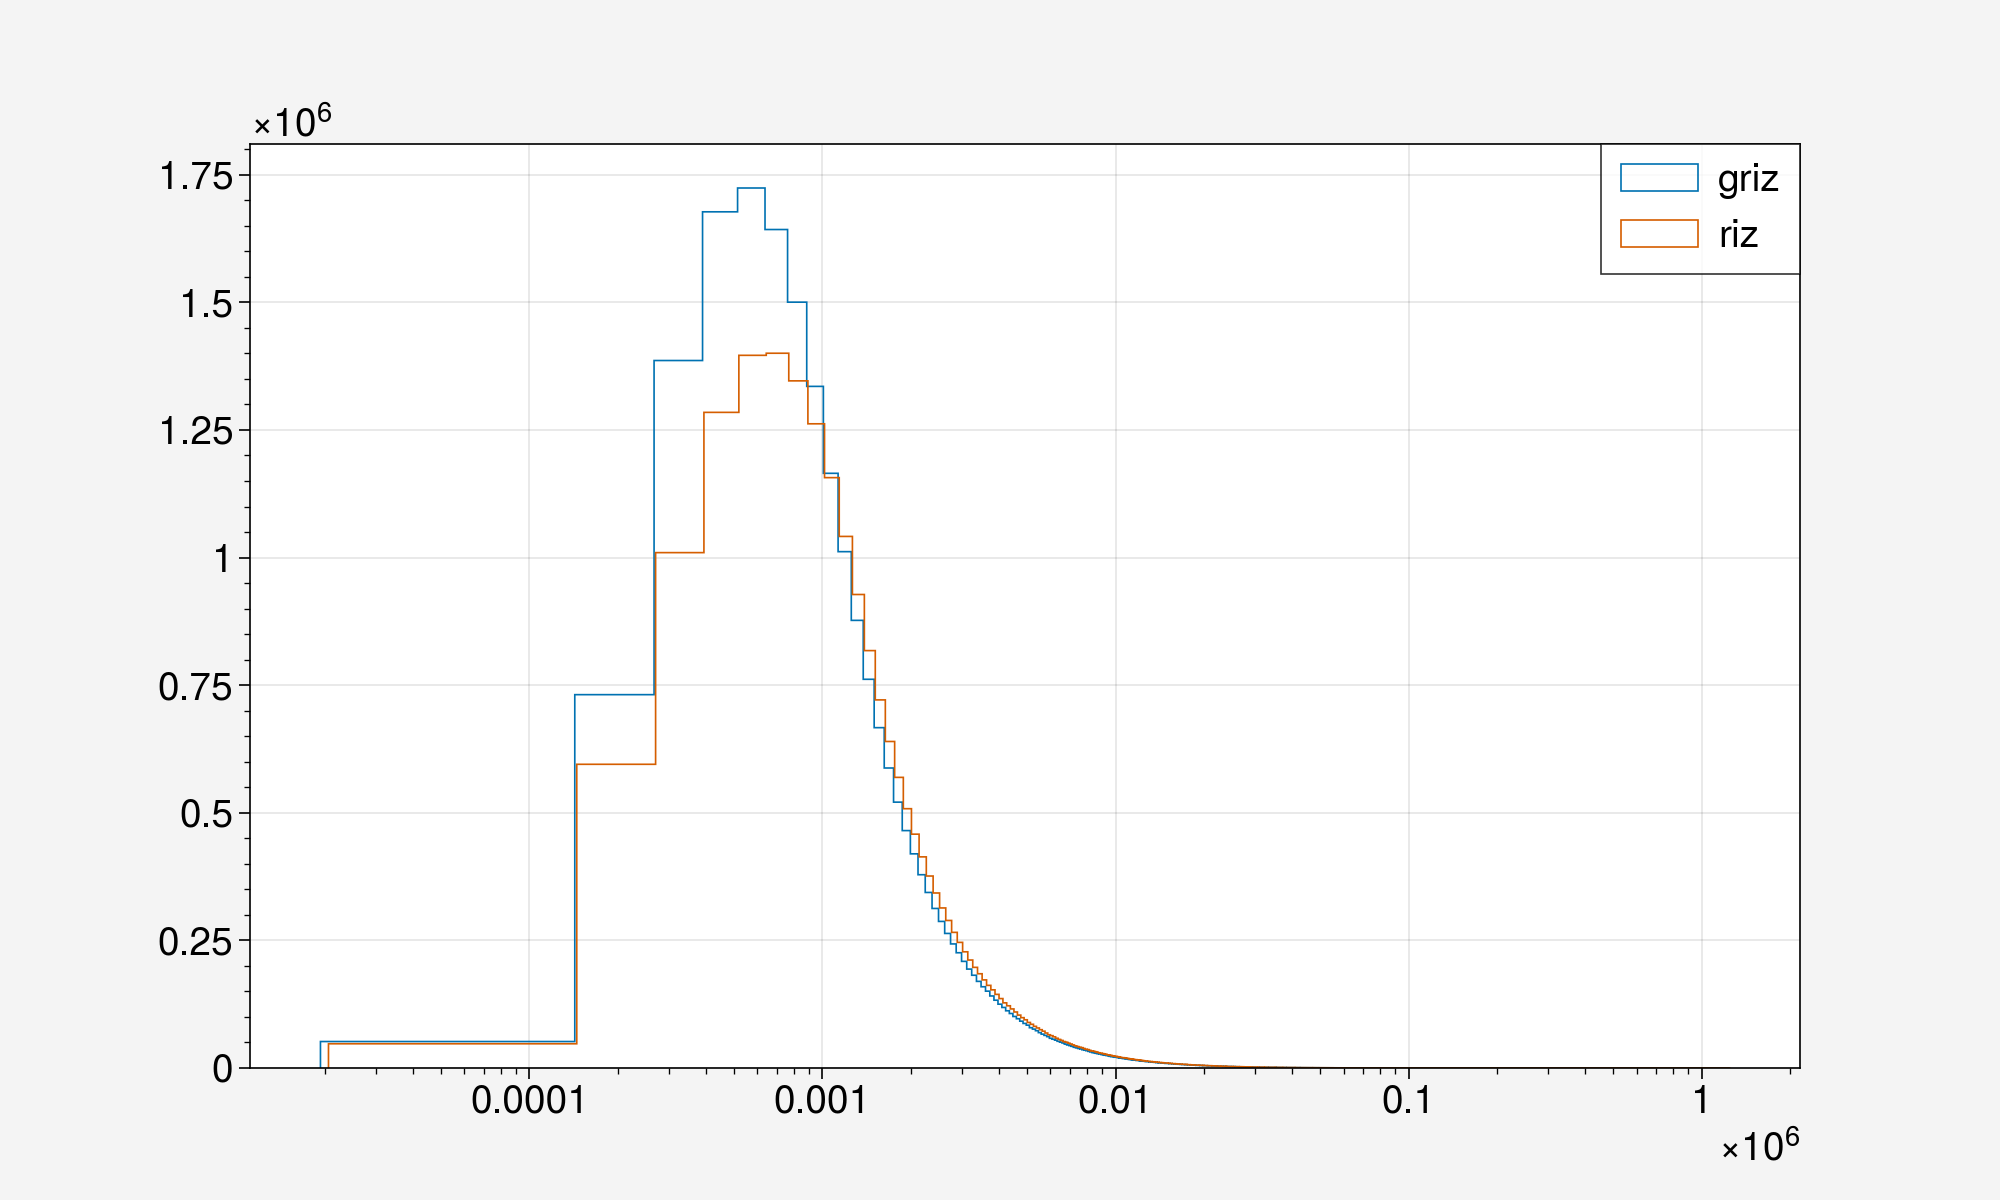

In [10]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax2=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax2.hist(sb_griz, bins=10000, histtype='step', label='griz')
ax2.hist(sb_riz, bins=10000, histtype='step', label='riz')
ax2.set_xscale('log')
ax2.legend()

Text(0.5, 1.0, 'riz')

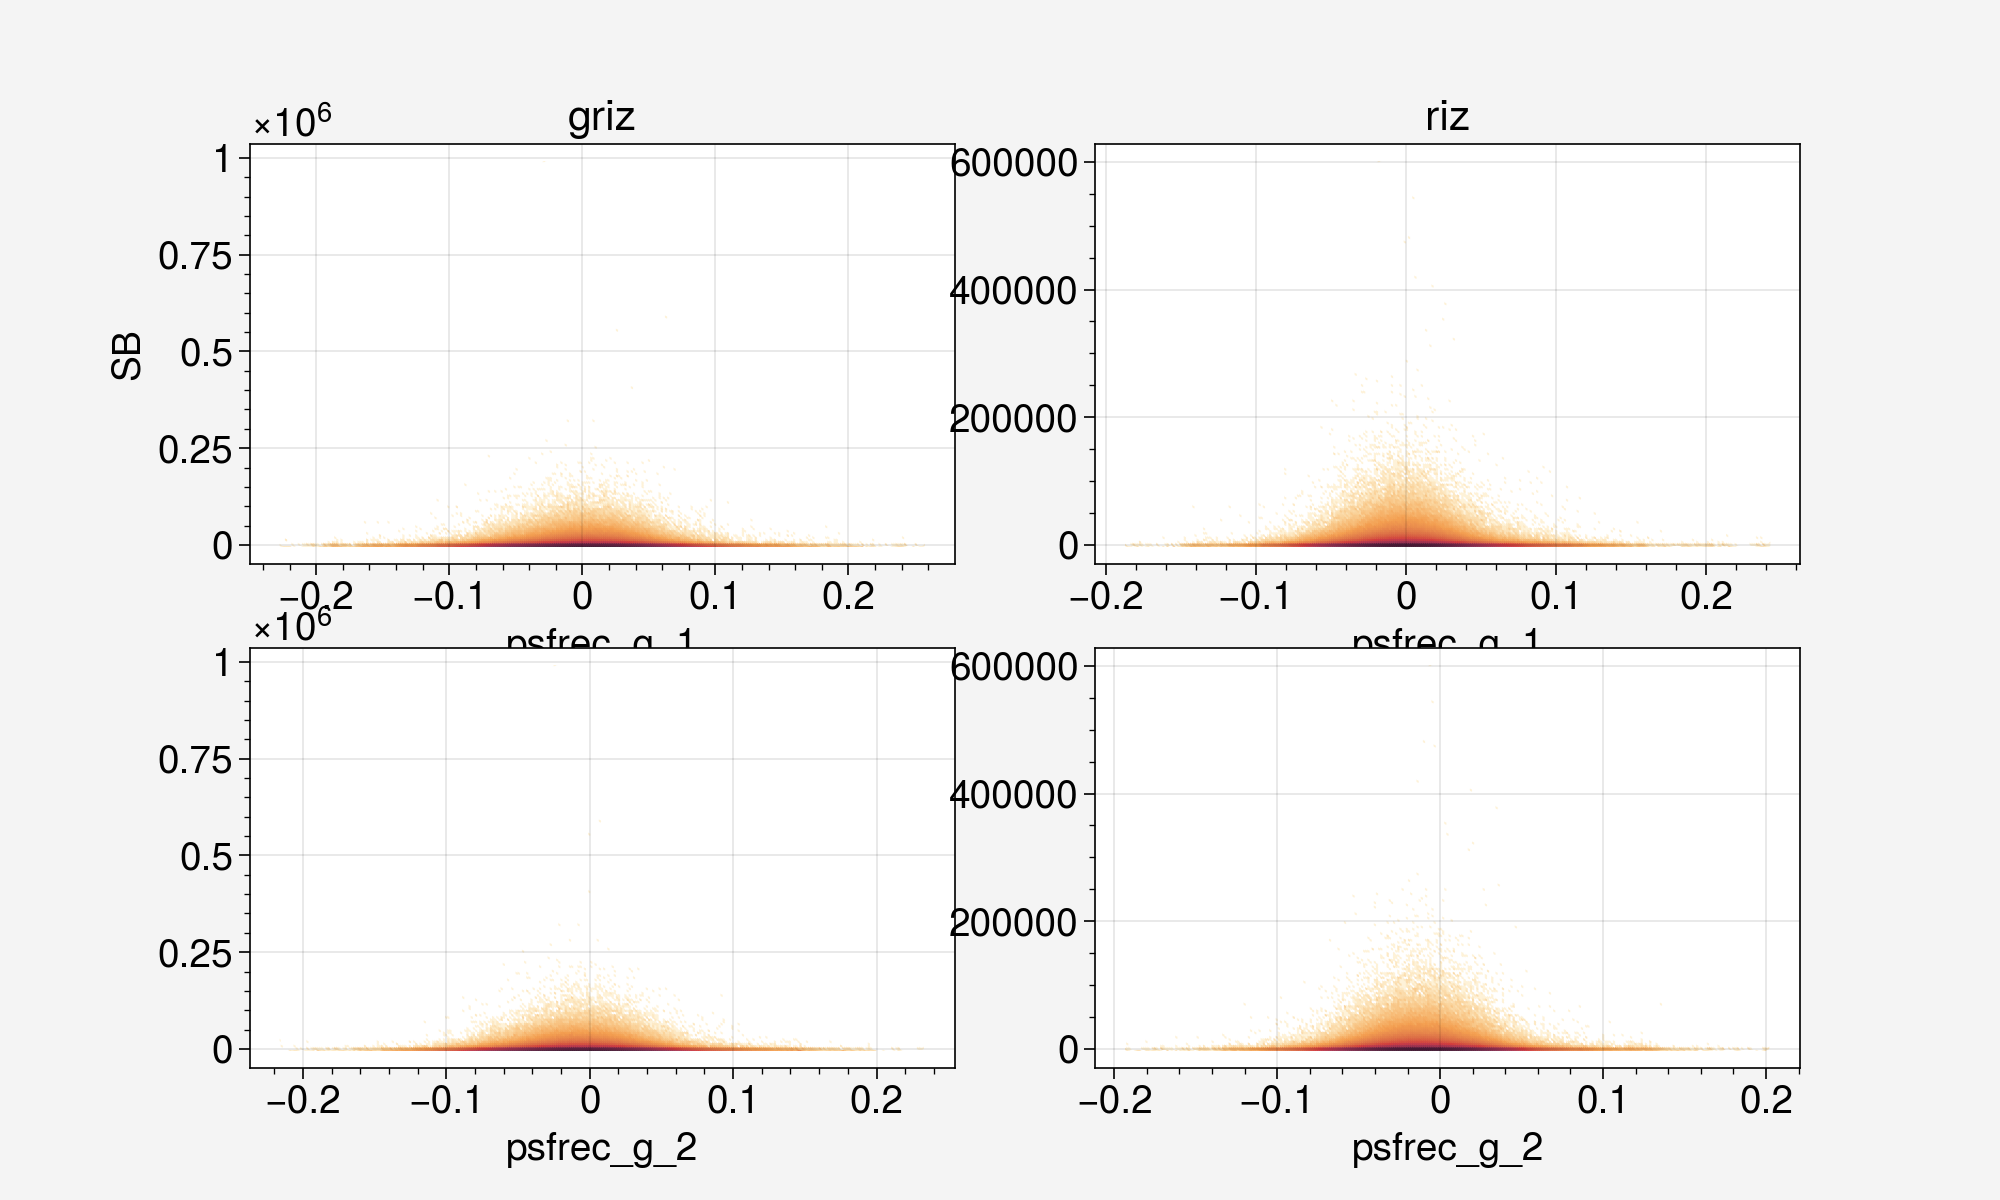

In [22]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax2=plt.subplots(nrows=2, ncols=2, figsize=(10,6))

ax2[0,0].hexbin(d_pgauss['psfrec_g_1'], sb_griz, gridsize=300, bins='log')
ax2[0,1].hexbin(d_pgauss_riz['psfrec_g_1'],sb_riz, gridsize=300, bins='log')
ax2[1,0].hexbin(d_pgauss['psfrec_g_2'], sb_griz, gridsize=300, bins='log')
ax2[1,1].hexbin(d_pgauss_riz['psfrec_g_2'],sb_riz, gridsize=300, bins='log')


ax2[0,0].set_xlabel('psfrec_g_1')
ax2[1,0].set_xlabel('psfrec_g_2')
ax2[0,0].set_ylabel('SB')
ax2[0,0].set_title('griz')
ax2[0,1].set_xlabel('psfrec_g_1')
ax2[1,1].set_xlabel('psfrec_g_2')
ax2[0,1].set_title('riz')

## Location dependence

In [ ]:
d = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/shear_info_pgauss_griz.fits')

In [ ]:
np.mean(d['ra']>360)

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

fig,ax=pplt.subplots()
ax.scatter(d['ra'], d['dec'], s=0.05)
ax.set_xlim(-10,100)

In [ ]:
d_large_shear = d[gsq_pgauss > 5]
print(np.mean(gsq_pgauss > 5))
fig,ax=pplt.subplots()
ax.scatter(d_large_shear['ra'], d_large_shear['dec'], s=0.05)
ax.set_xlim(-10,100)